# Libraries

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import scipy.stats as stats
from dython.nominal import associations
from dython.nominal import identify_nominal_columns
import plotly.io as pio
import os
from matplotlib.lines import Line2D

In [79]:
paths = ["Pie", "Bar", "Bar_hue", "Radar", "Box", "Lollipop", "Journal"]

if not os.path.exists("images"):
    os.mkdir("images")

for path in paths:
    if not os.path.exists(f'images/{path}'):
        os.mkdir(f'images/{path}')

# Loading dataset

In [80]:
df = pd.read_excel("data.xlsx")

In [81]:
df.head()

Gender       Age range  Current role Campus               Affiliation  \
0  Female   Over 50 years  Professional    CCM      Highschool Education   
1  Female   Over 50 years  Professional    MTY                  Business   
2  Female  40 to 50 years  Professional    MTY                  Business   
3    Male   Over 50 years  Professional    TOL  Engineering and Sciences   
4  Female  35 to 40 years  Professional    MTY  Humanities and Education   

  Programming experience Data analytics experience  \
0                     No                        No   
1                   Some                       Yes   
2                    Yes                        No   
3                    Yes                       Yes   
4                   Some                       Yes   

  Experience using tools like Python, Colab, etc.  \
0                                              No   
1                                            Some   
2                                              No   
3                                             Yes   
4                                            Some   

  Experience using ChatGPT in general  \
0                                 Yes   
1                                 Yes   
2                                 Yes   
3                                 Yes   
4                                 Yes   

  Experience using ChatGPT for programming  \
0                                       No   
1                                       No   
2                                       No   
3                                     Some   
4                                       No   

  Experience using ChatGPT for data analytics  \
0                                          No   
1                                          No   
2                                          No   
3                                          No   
4                                        Some   

  Experience using generative APIs Time required to finish activity 1  \
0                              Yes                   10 to 15 minutes   
1                             Some                   15 to 30 minutes   
2                               No                   15 to 30 minutes   
3                             Some                    5 to 10 minutes   
4                               No                    5 to 10 minutes   

  Time required to finish activity 2 Time required to finish activity 3  \
0                   15 to 30 minutes                   15 to 30 minutes   
1                   10 to 15 minutes               More than 30 minutes   
2                   15 to 30 minutes                   15 to 30 minutes   
3                   10 to 15 minutes                   10 to 15 minutes   
4                Less than 5 minutes                Less than 5 minutes   

                        Ease of use                   Speed of result  \
0         LIDA with GPT integration         LIDA with GPT integration   
1  ChatGPT as an external assistant  ChatGPT as an external assistant   
2         LIDA with GPT integration         LIDA with GPT integration   
3  ChatGPT as an external assistant  ChatGPT as an external assistant   
4  ChatGPT as an external assistant  ChatGPT as an external assistant   

             Appropriateness      Helpful                Correctness  
0  LIDA with GPT integration        A lot  LIDA with GPT integration  
1  LIDA with GPT integration  Yes, enough  LIDA with GPT integration  
2  LIDA with GPT integration        A lot  LIDA with GPT integration  
3  LIDA with GPT integration        A lot  LIDA with GPT integration  
4  LIDA with GPT integration        A lot  LIDA with GPT integration

# Categorical variables correlation

This is a test.

- https://medium.com/@knoldus/how-to-find-correlation-value-of-categorical-variables-23de7e7a9e26 
- https://shakedzy.xyz/dython/

In [82]:
categorical_features=identify_nominal_columns(df)
categorical_features

['Gender',
 'Age range',
 'Current role',
 'Campus',
 'Affiliation',
 'Programming experience',
 'Data analytics experience',
 'Experience using tools like Python, Colab, etc.',
 'Experience using ChatGPT in general',
 'Experience using ChatGPT for programming',
 'Experience using ChatGPT for data analytics',
 'Experience using generative APIs',
 'Time required to finish activity 1',
 'Time required to finish activity 2',
 'Time required to finish activity 3',
 'Ease of use',
 'Speed of result',
 'Appropriateness',
 'Helpful',
 'Correctness']

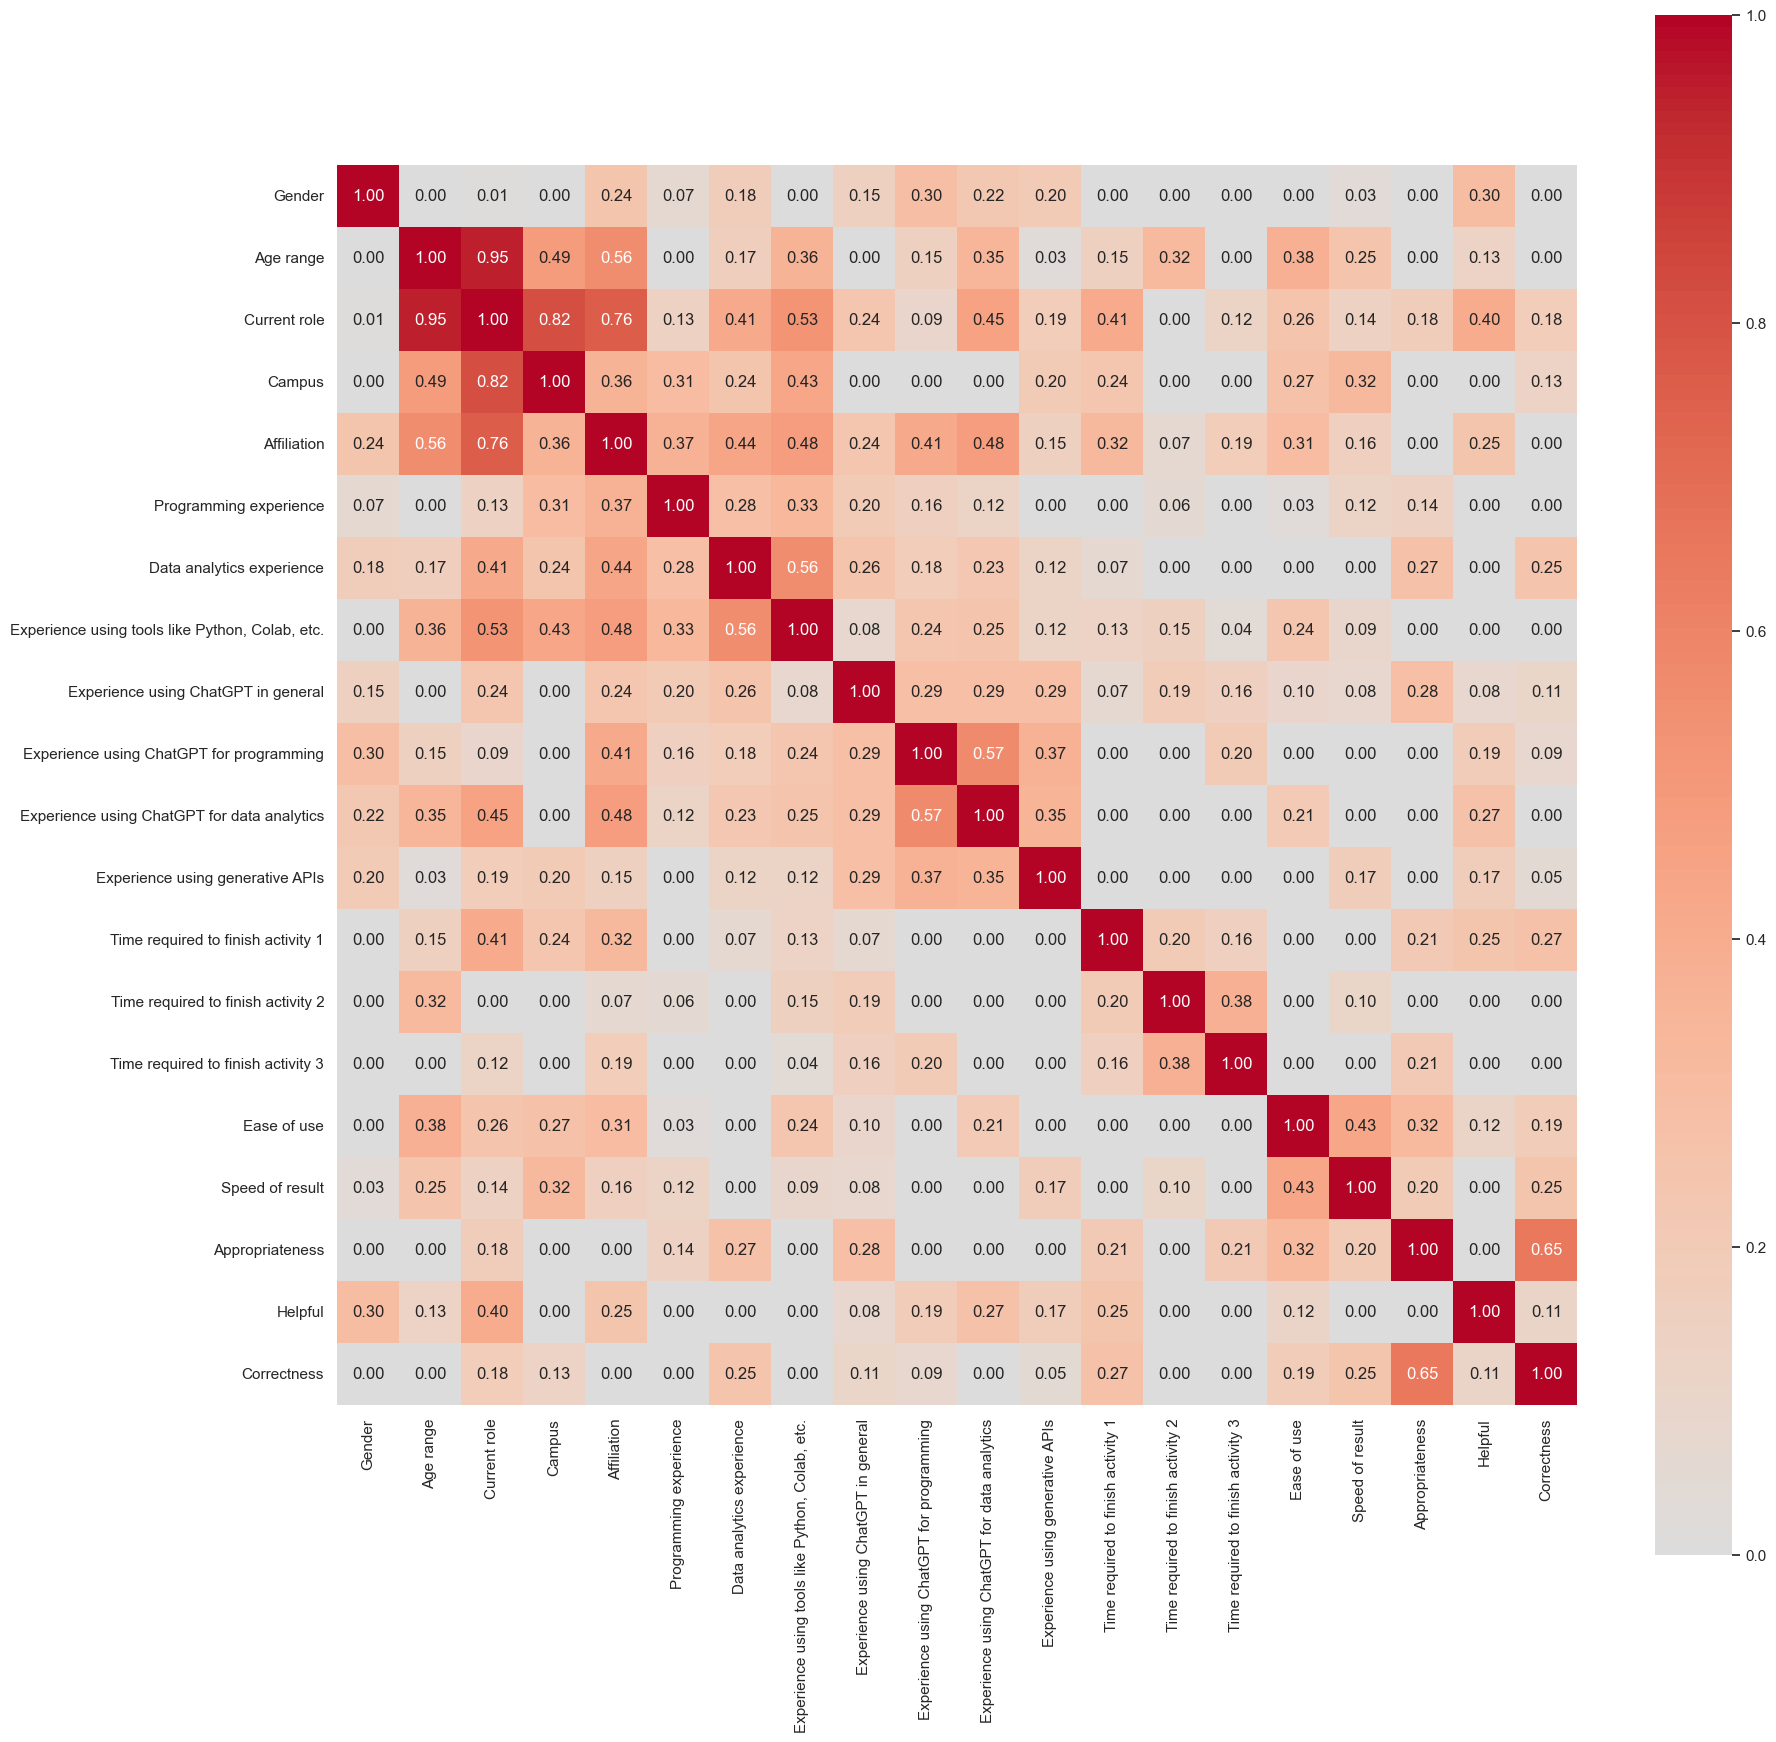

In [83]:
complete_correlation= associations(df[categorical_features], figsize=(20,20), cmap='coolwarm')

# Useful functions

In [84]:
def get_uniques(dataframe: pd.DataFrame) -> dict:
  """
  Gets the unique values for each column of a dataframe

    Parameters
    ----------
    dataframe : pd.DataFrame
        The dataframe to be processed

    Returns
    -------
    dictionary
        A dictionary where the keys are the colums of the dataframe, and the values are the unique values of the column
  """
  unique_values = {}

  for column in dataframe:
    unique_values[column] = pd.unique(dataframe[column])

  return unique_values

In [85]:
sns.set_theme(style="whitegrid")
palette = "Pastel1"
sns.set_palette(palette)

In [86]:
def pie_chart(data, column, colors=None, title=True, subpath="", article_image=False):
    df_pie = data[column].value_counts()
    plot = df_pie.plot.pie(title=f"Number of participants by {column.lower()}" if title else "", 
                           startangle=90, 
                           autopct='%1.0f%%', 
                           ylabel="", 
                           legend=None,
                           colors=[colors[v] for v in df_pie.keys()] if colors is not None else None)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()
    path = "Pie" if not article_image else "Journal"
    subpath = f" for {subpath.lower()}" if subpath else ""
    plot.get_figure().savefig(f"images/{path}/Pie - Number of participants by {column.lower()}{subpath}.png", bbox_inches='tight')

In [87]:
def bar_chart(data, column, title=True, subpath="", article_image=False):
    ax = sns.countplot(x=column, data=data, order=data[column].value_counts().index)
    ax.set_title(f"Number of participants by {column.lower()}" if title else "")
    ax.set_ylabel("Number of participants")
    ax.set_yticks(range(0, 30, 5))
    ax.set_xlabel(None)
    plt.xticks(rotation=90)
    plt.show()
    path = "Bar" if not article_image else "Journal"
    subpath = f" for {subpath.lower()}" if subpath else ""
    ax.figure.savefig(f"images/{path}/Bar - Number of participants by {column.lower()}{subpath}.png", bbox_inches='tight')


In [88]:
def bar_chart_hue(data, column, hue, title=True, subpath="", article_image=False):
    ax = sns.countplot(x=column, data=data, hue=hue, order=data[column].value_counts().index)
    ax.set_title(f"Number of participants by {column.lower()} and {hue.lower()}" if title else "")
    ax.set_ylabel("Number of participants")
    ax.set_yticks(range(0, 30, 5))
    ax.set_xlabel(None)
    plt.xticks(rotation=90)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()
    path = "Bar_hue" if not article_image else "Journal"
    subpath = f" for {subpath.lower()}" if subpath else ""
    ax.figure.savefig(f"images/{path}/Bar - Number of participants by {column.lower()} and {hue.lower()}{subpath}.png", bbox_inches='tight')

In [89]:
df.columns

Index(['Gender', 'Age range', 'Current role', 'Campus', 'Affiliation',
       'Programming experience', 'Data analytics experience',
       'Experience using tools like Python, Colab, etc.',
       'Experience using ChatGPT in general',
       'Experience using ChatGPT for programming',
       'Experience using ChatGPT for data analytics',
       'Experience using generative APIs',
       'Time required to finish activity 1',
       'Time required to finish activity 2',
       'Time required to finish activity 3', 'Ease of use', 'Speed of result',
       'Appropriateness', 'Helpful', 'Correctness'],
      dtype='object')

# Miscellaneus charts

## Pie charts

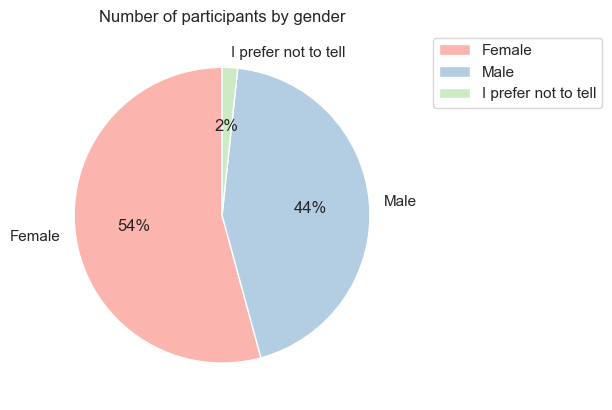

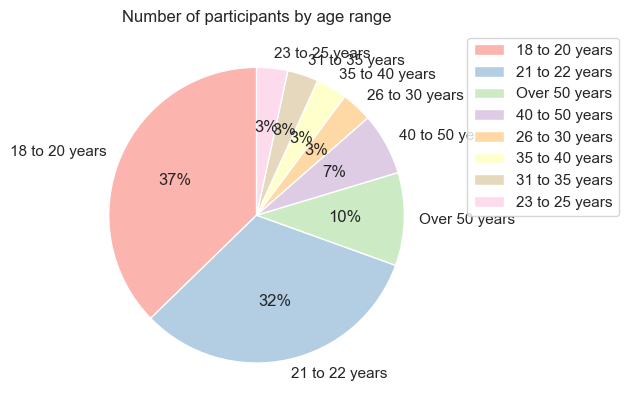

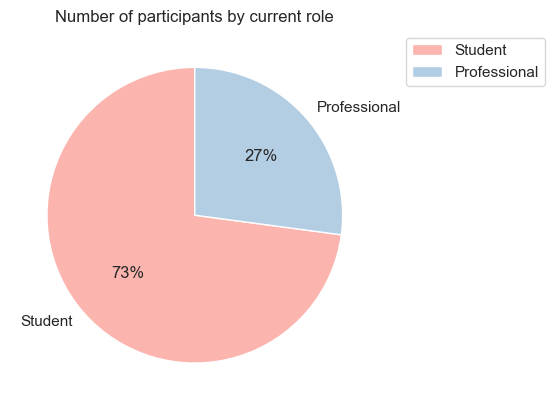

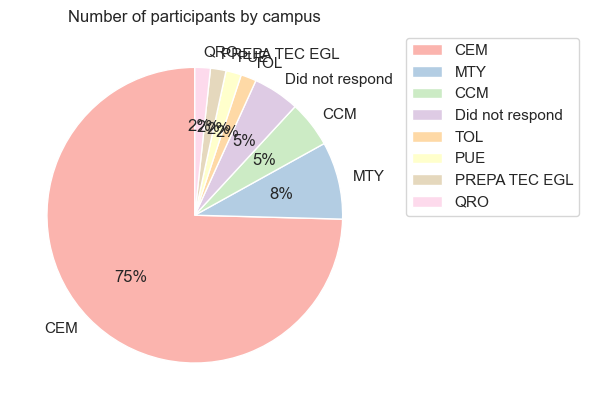

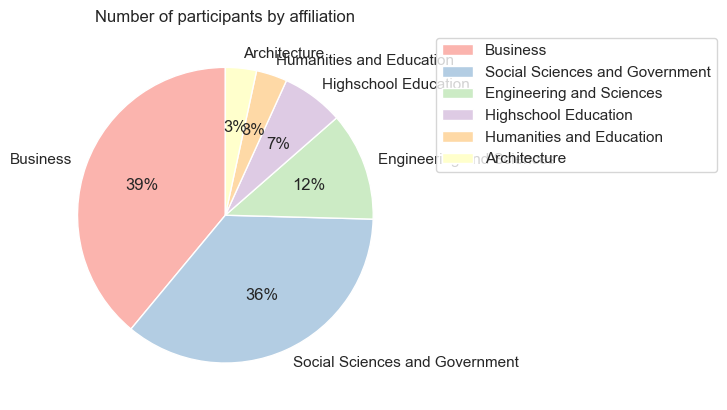

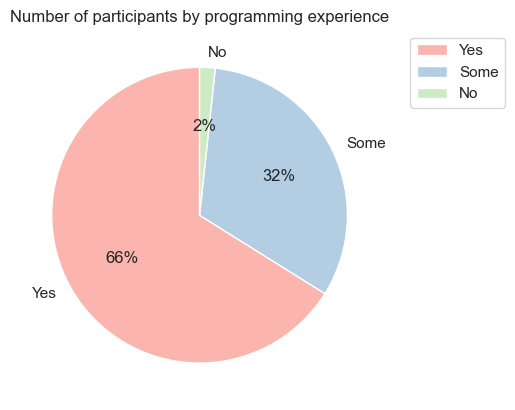

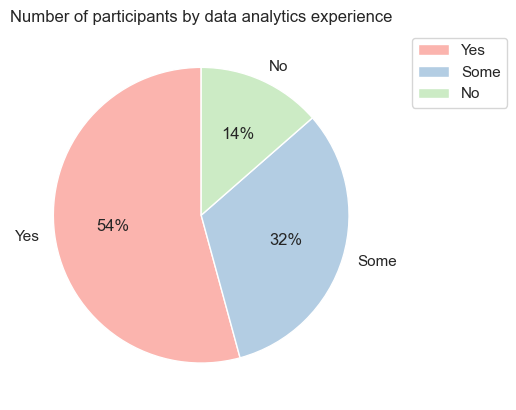

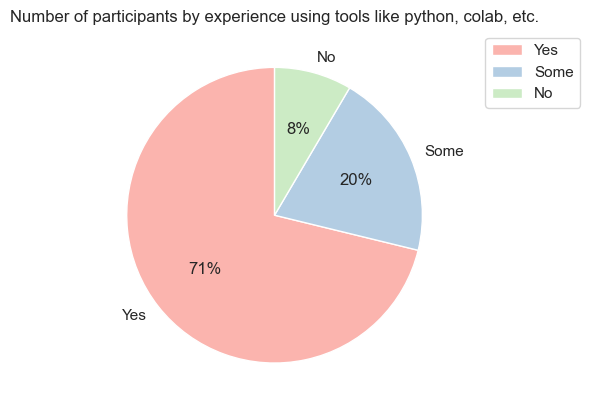

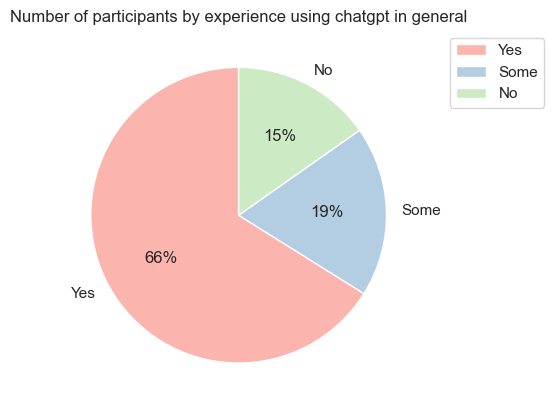

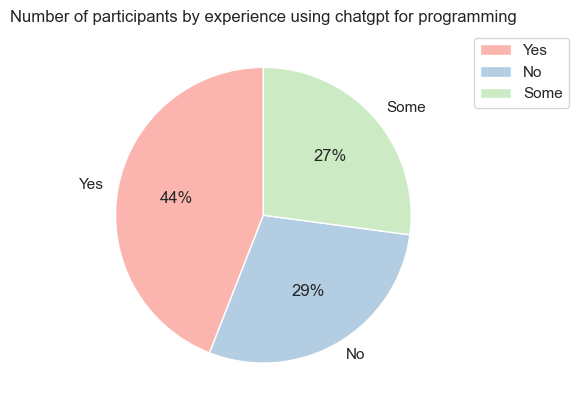

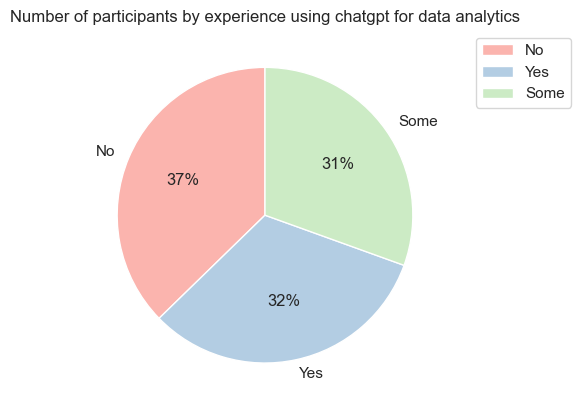

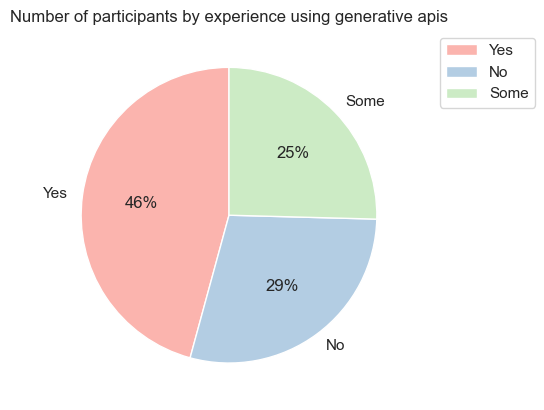

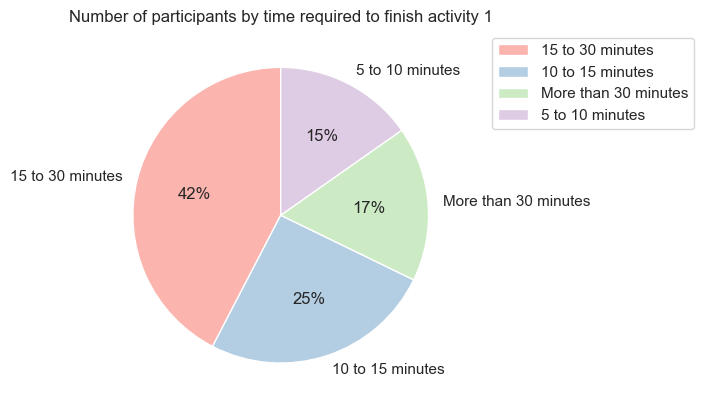

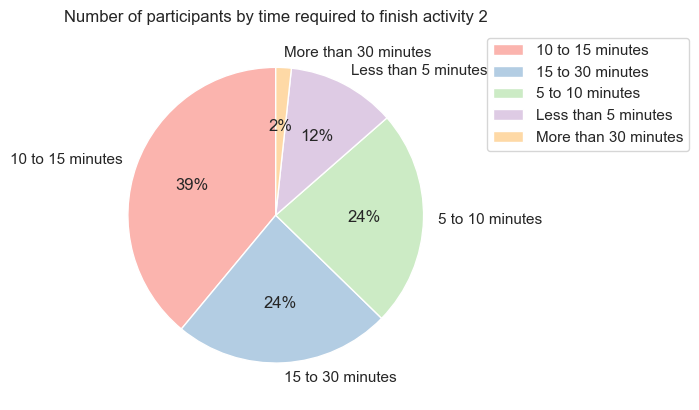

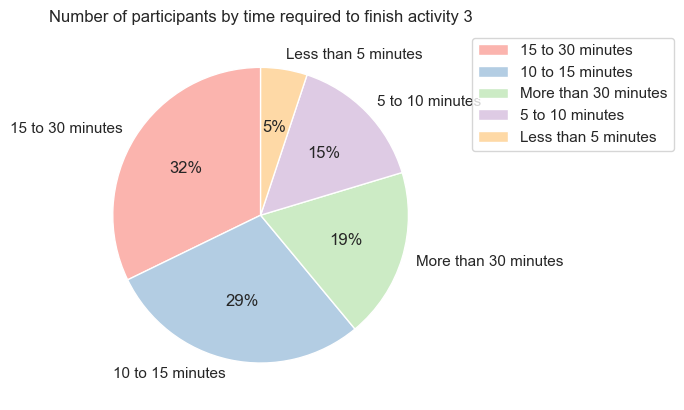

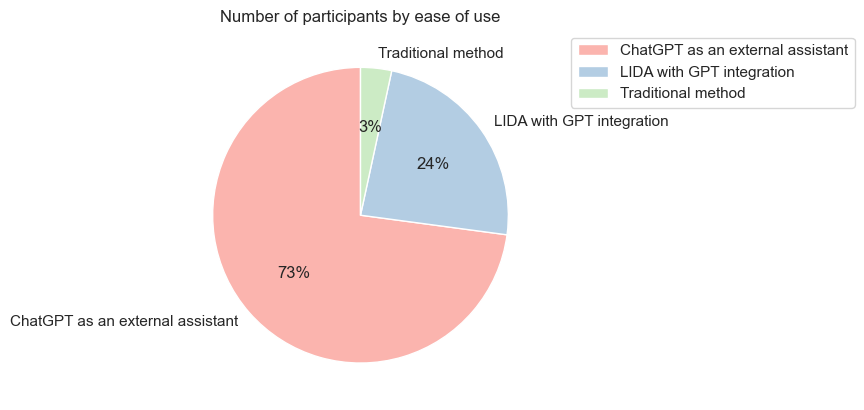

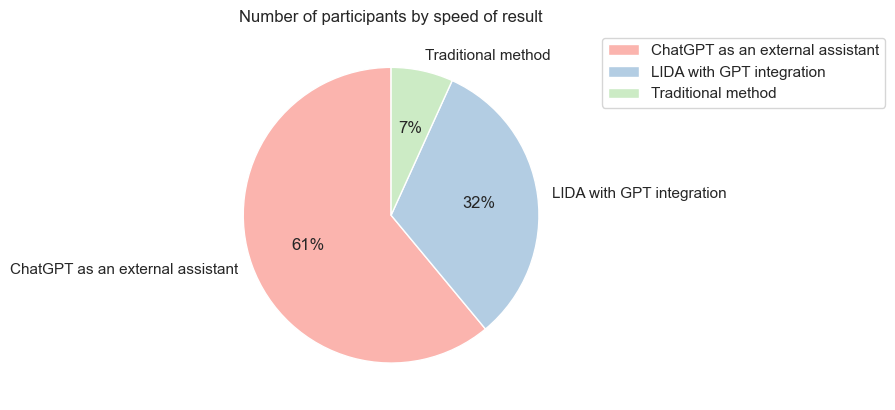

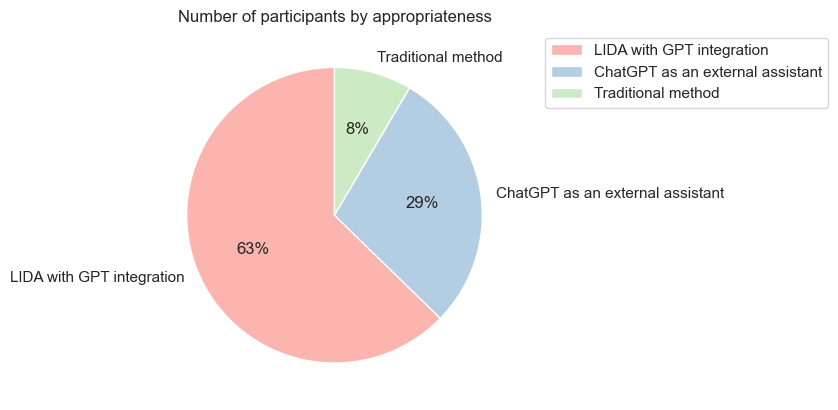

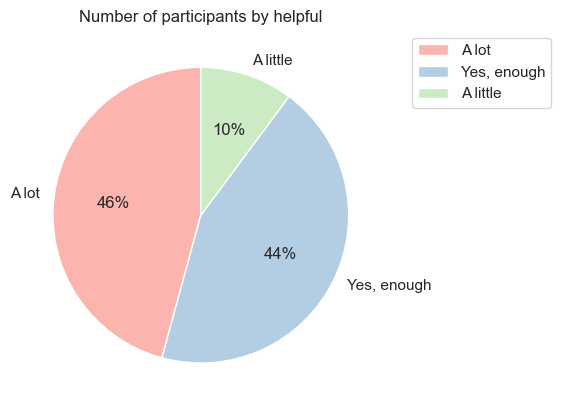

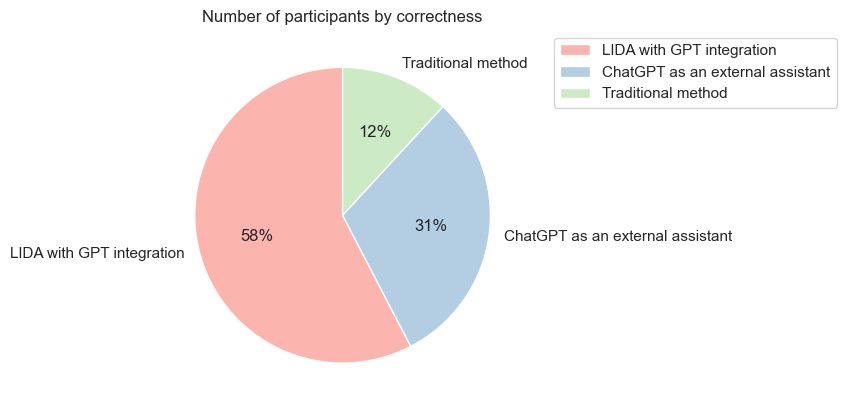

In [90]:
# Pie charts
for col in df.columns:
  pie_chart(df, col)

## Bar charts

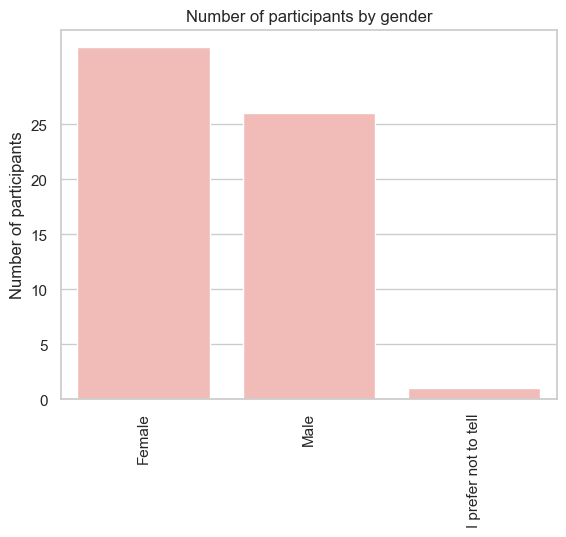

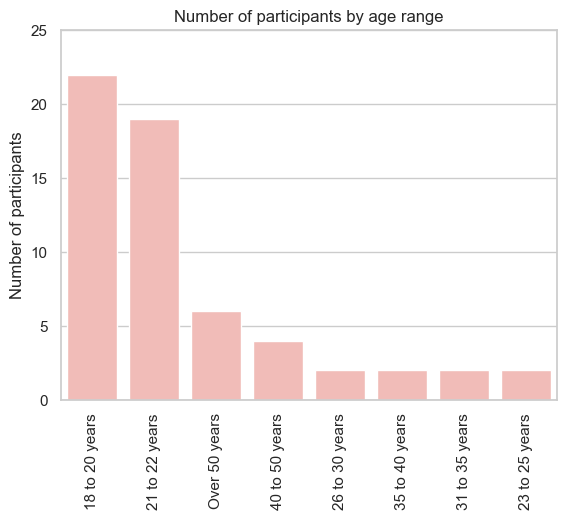

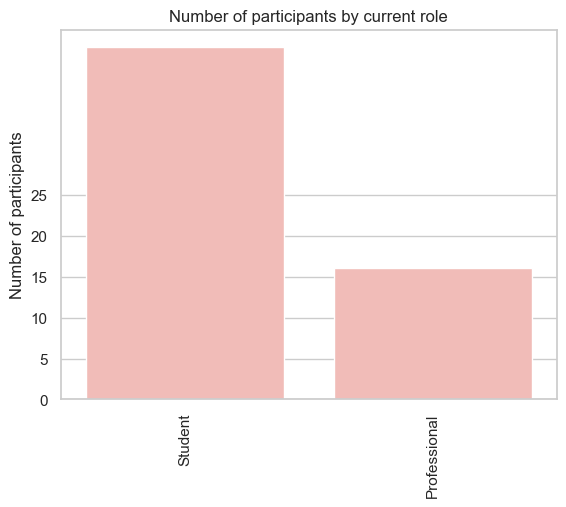

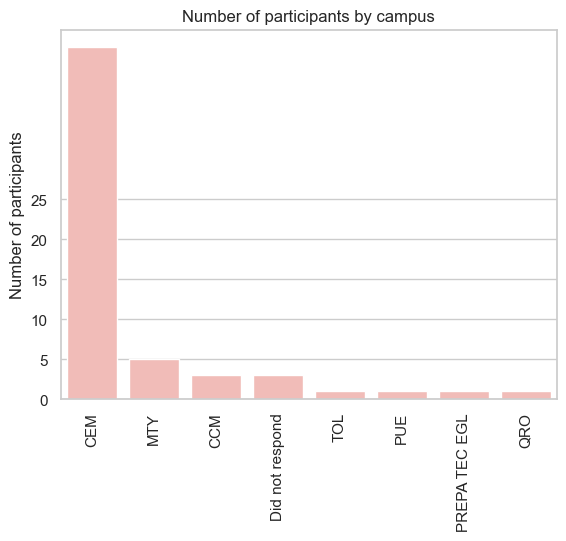

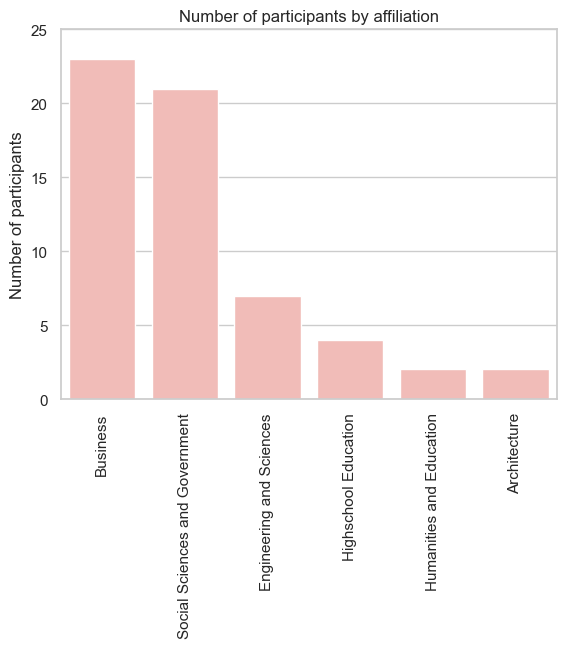

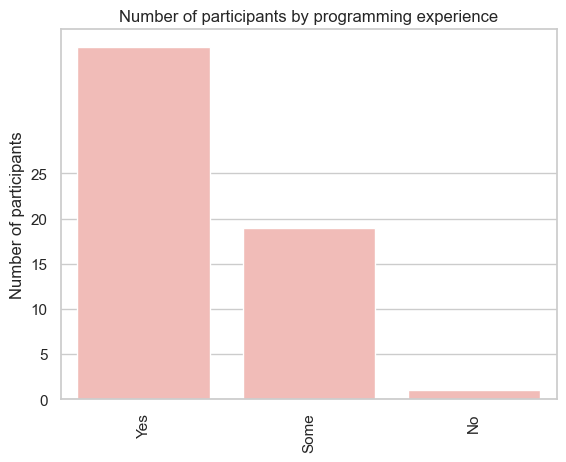

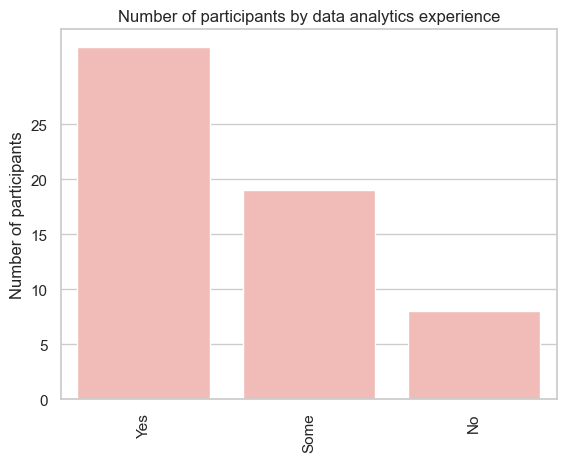

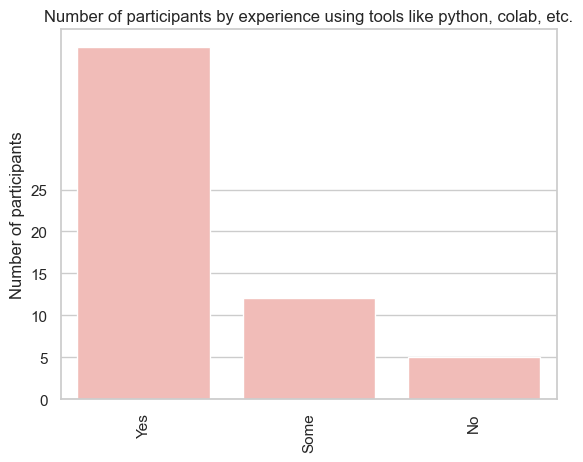

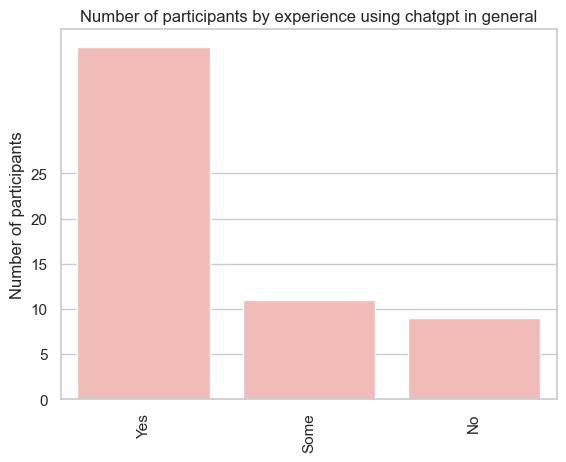

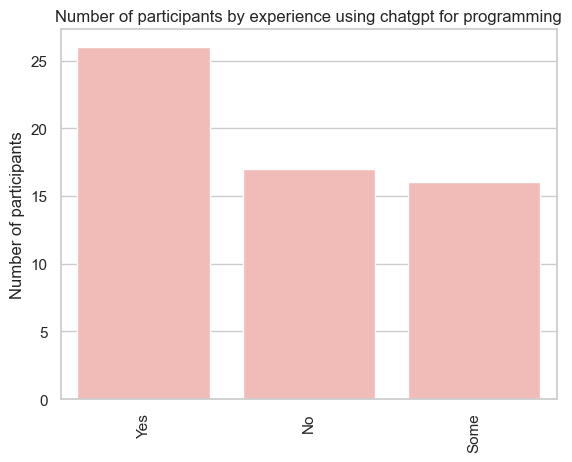

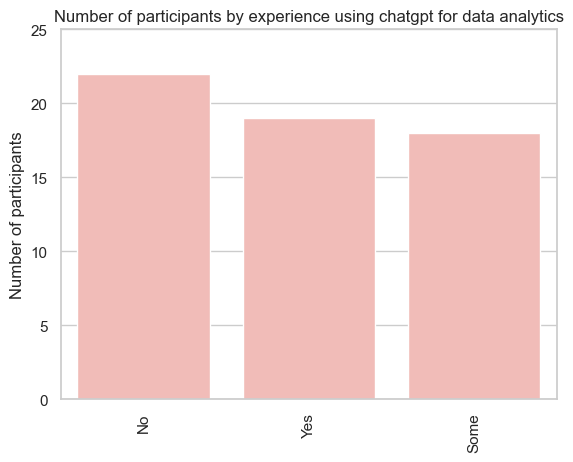

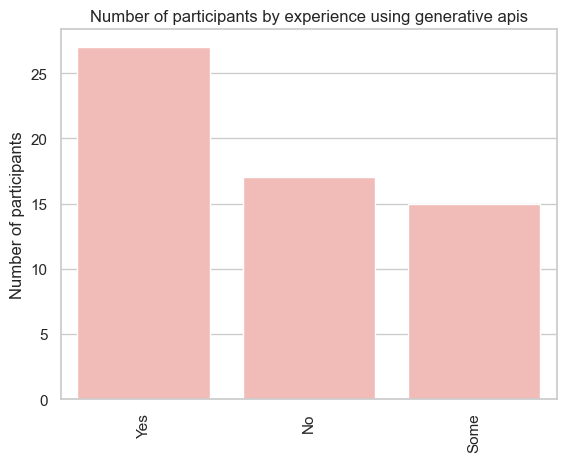

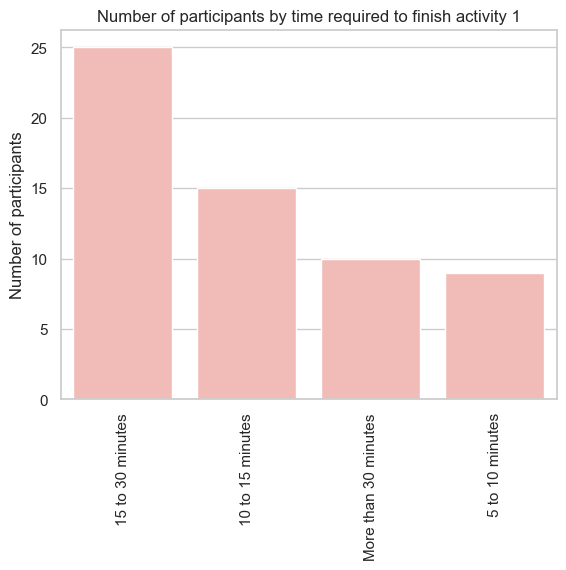

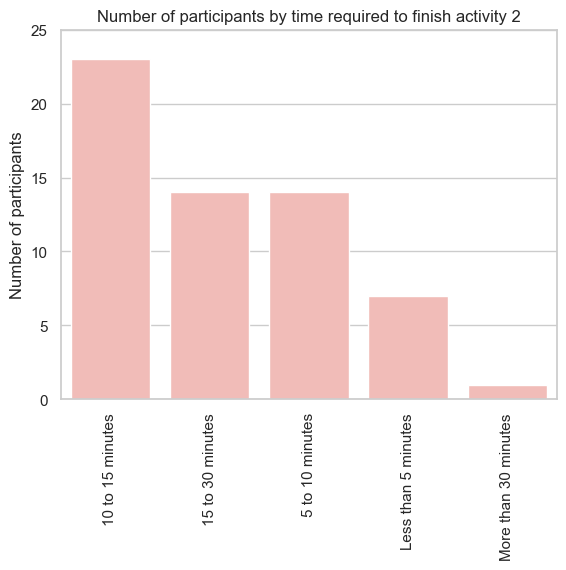

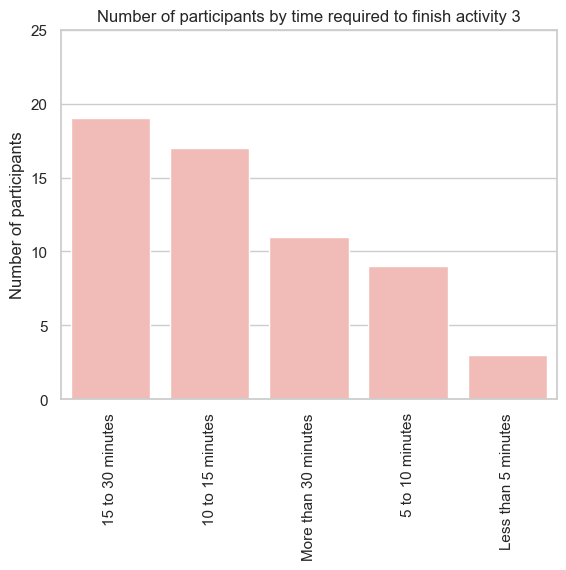

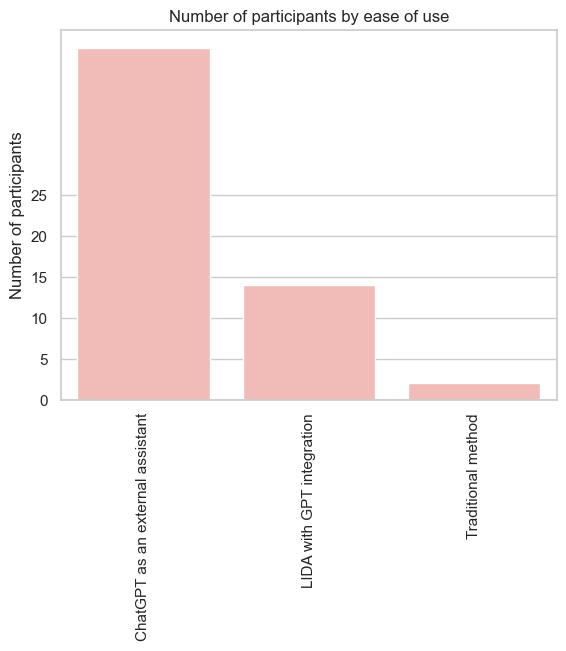

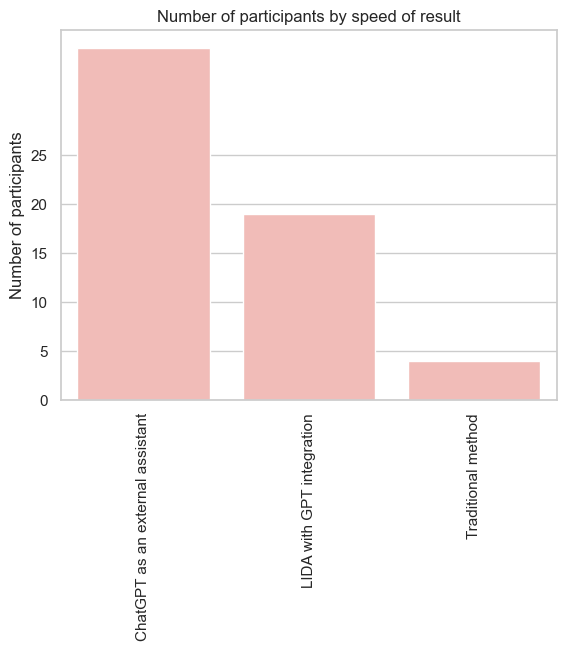

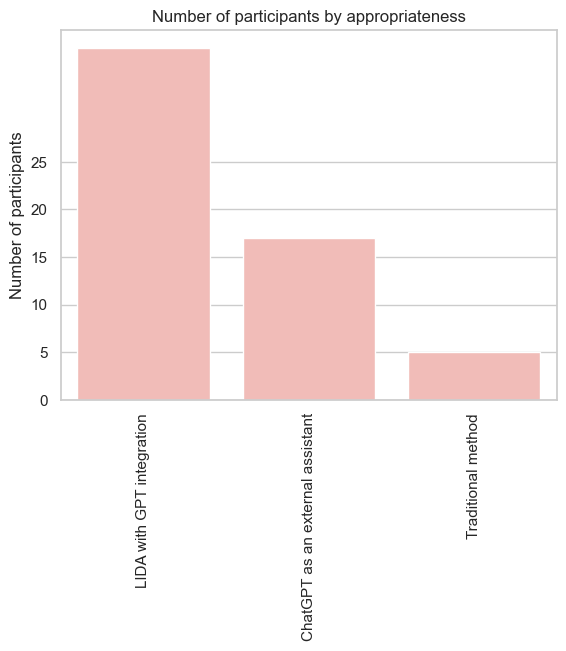

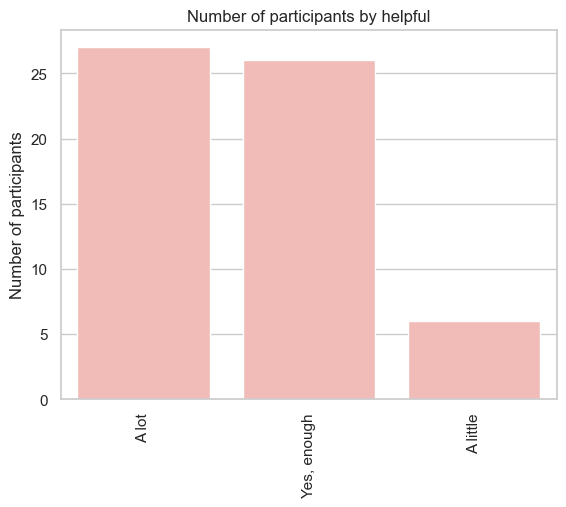

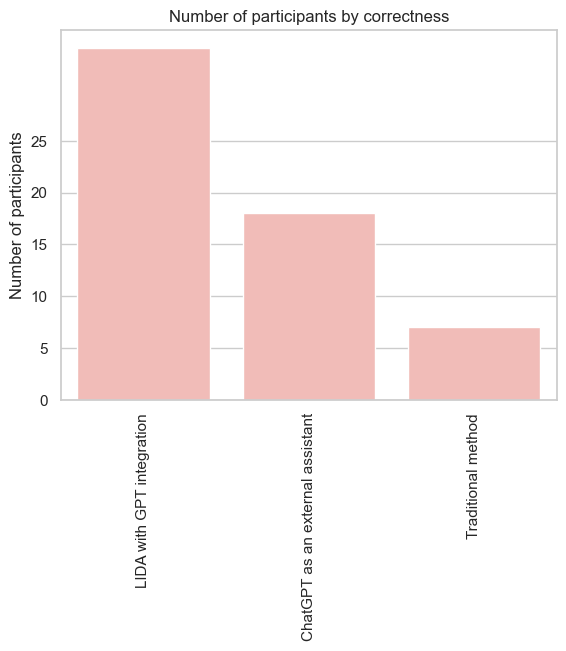

In [91]:
# Bar charts
for col in df.columns:
  bar_chart(df, col)

## Bar charts by gender

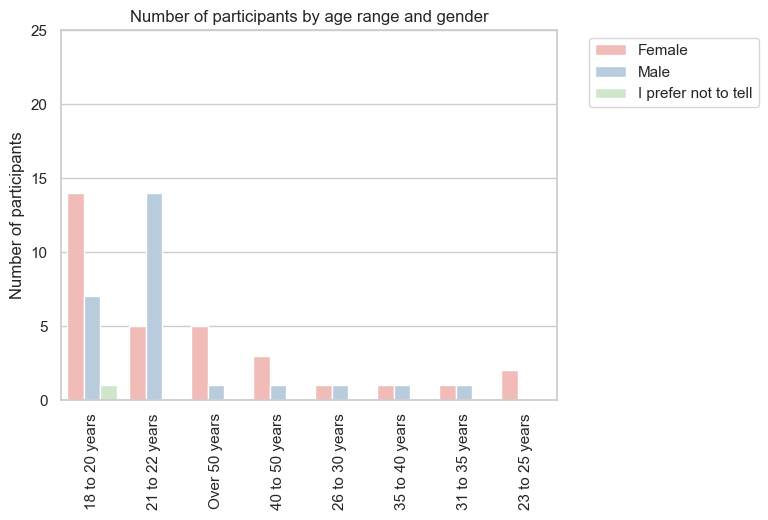

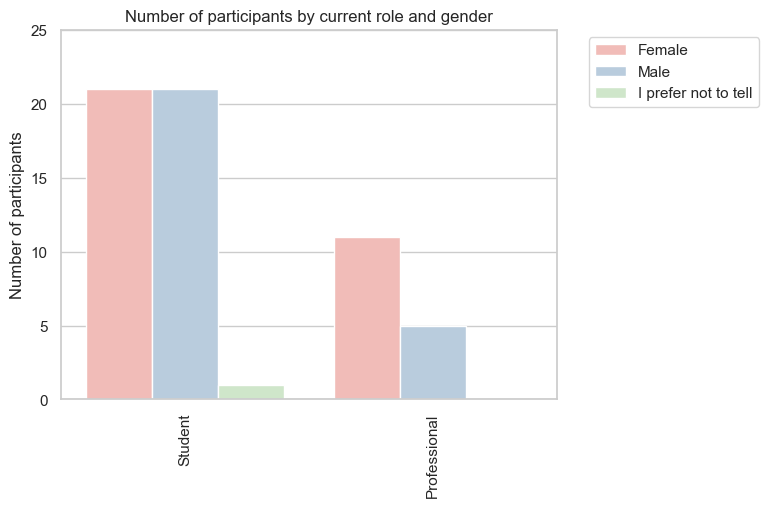

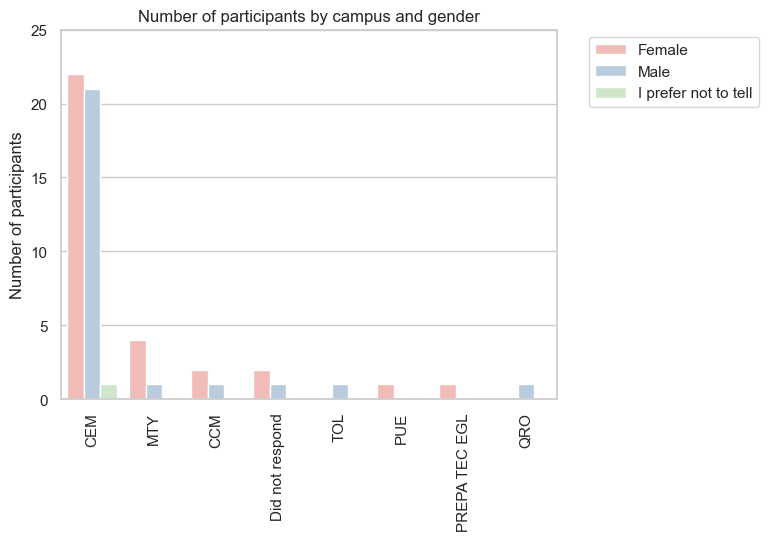

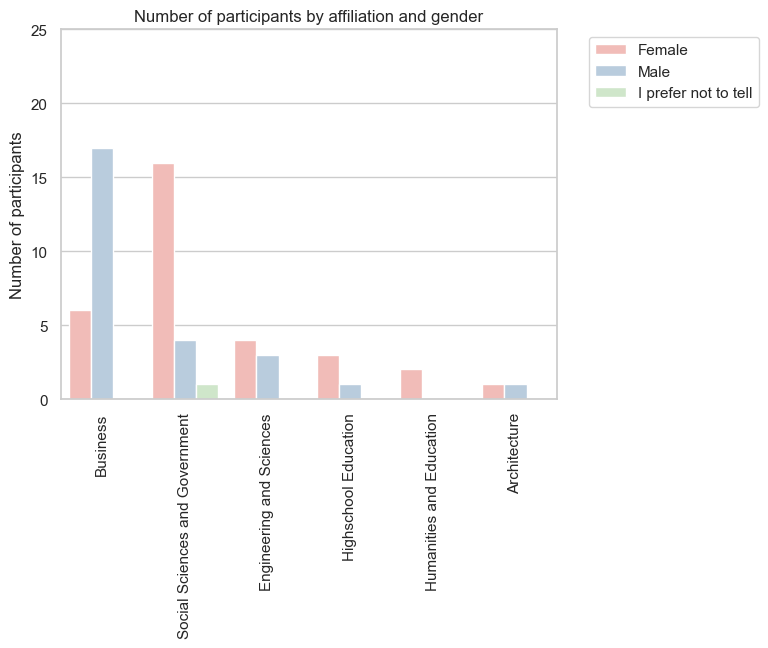

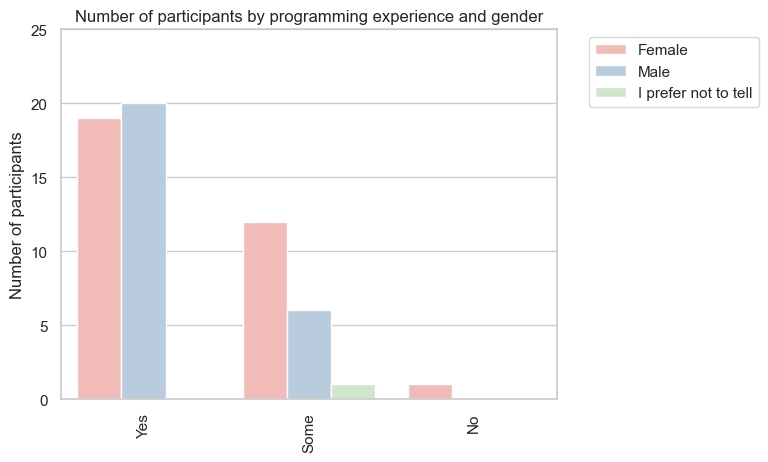

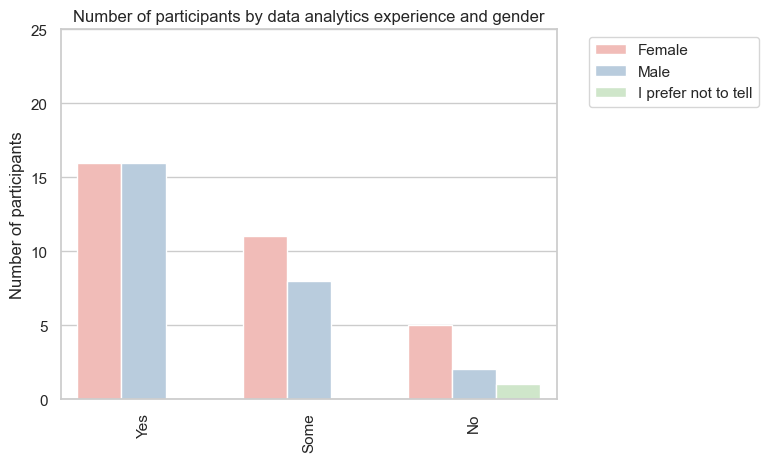

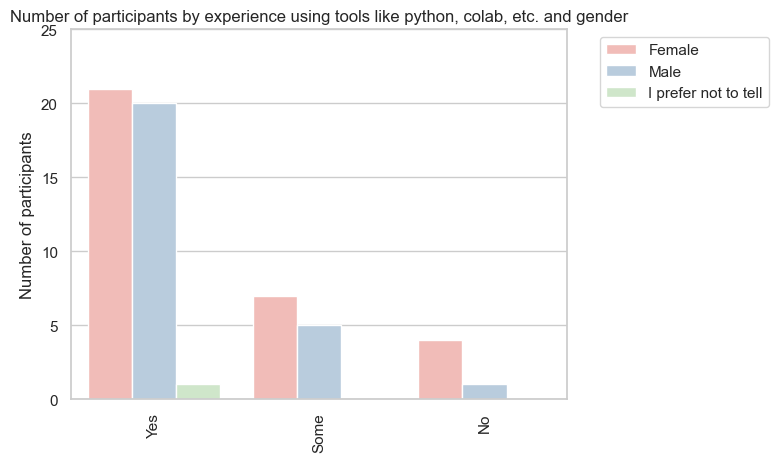

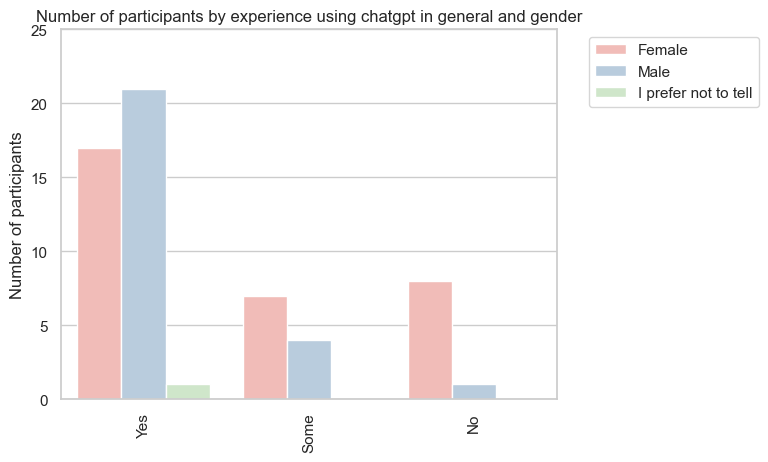

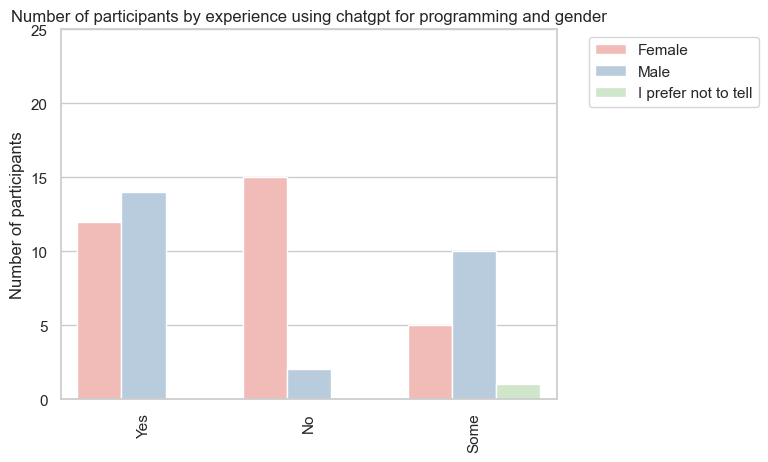

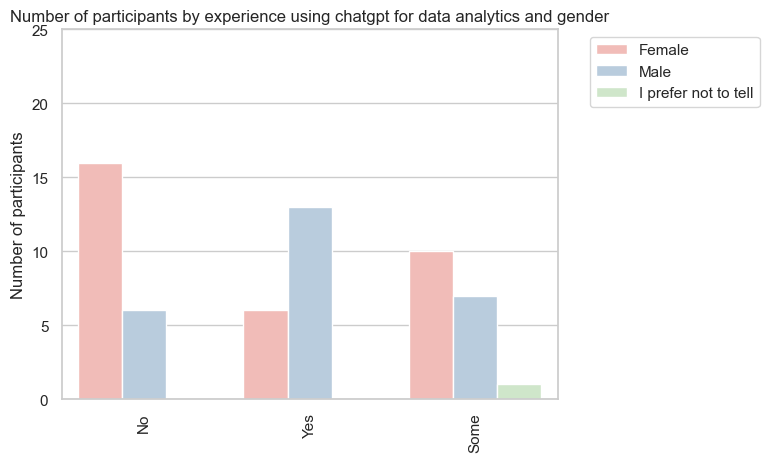

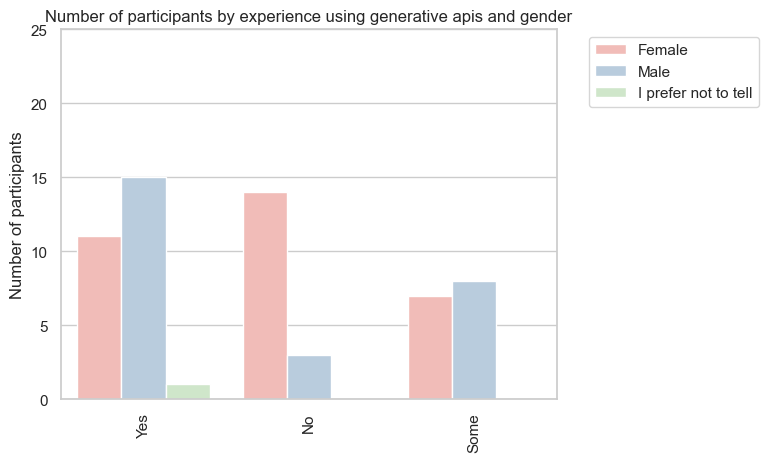

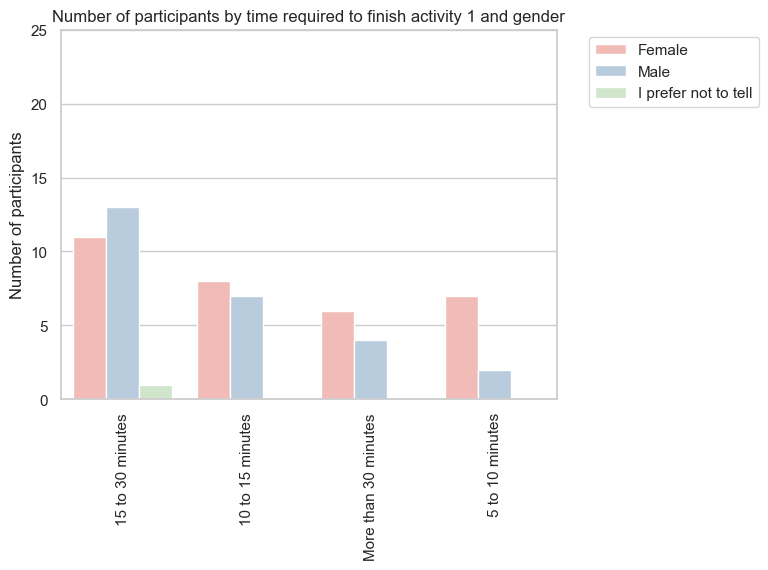

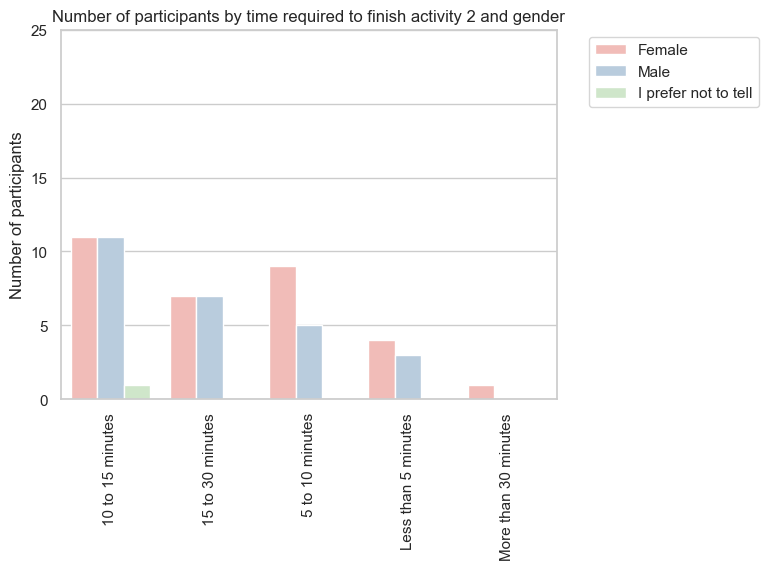

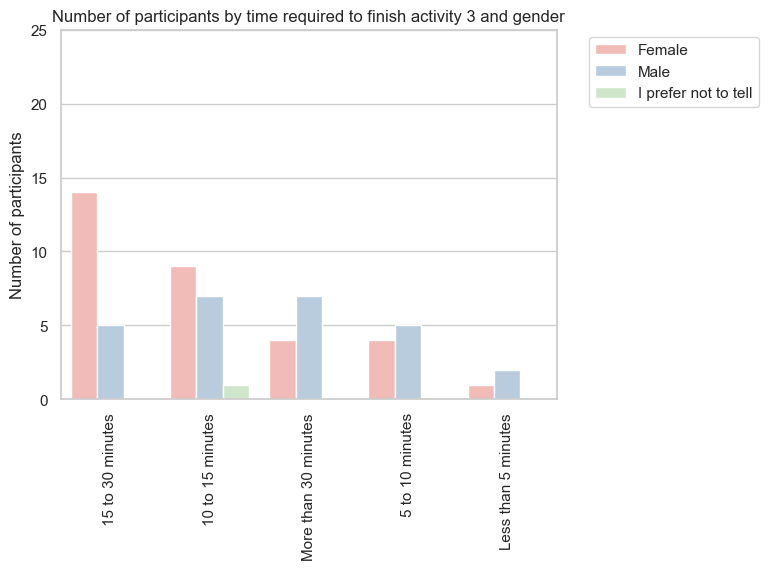

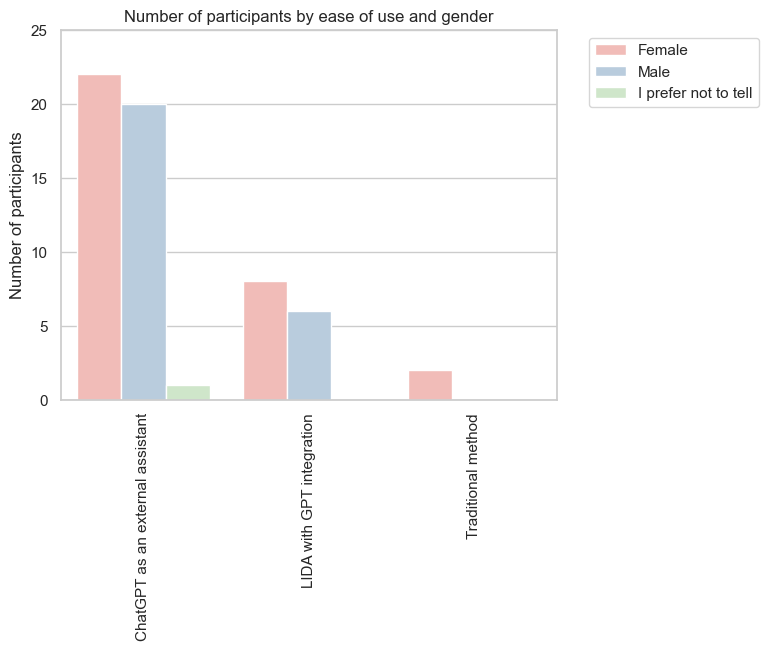

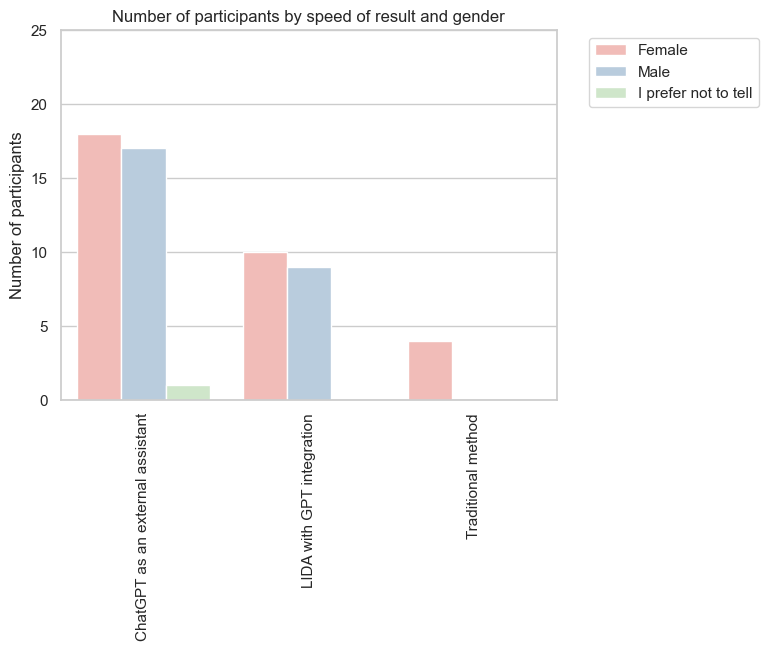

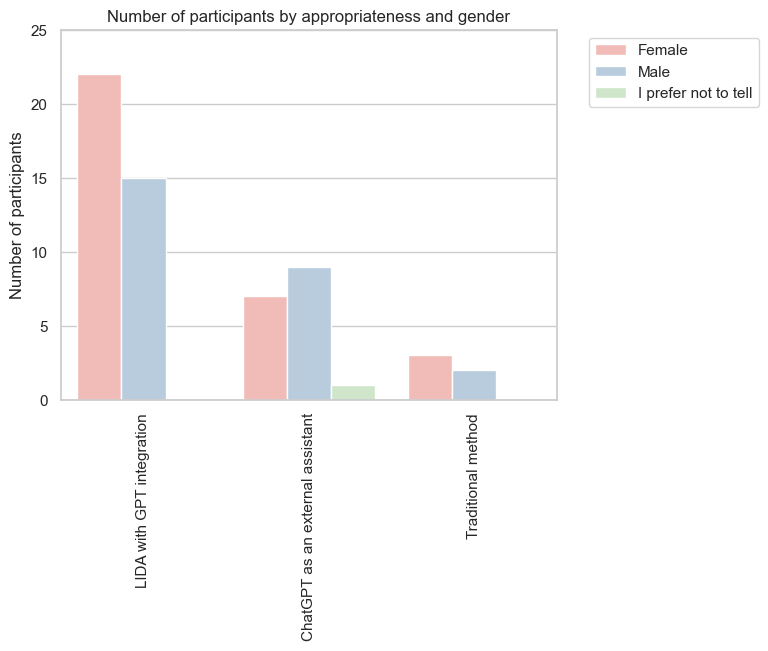

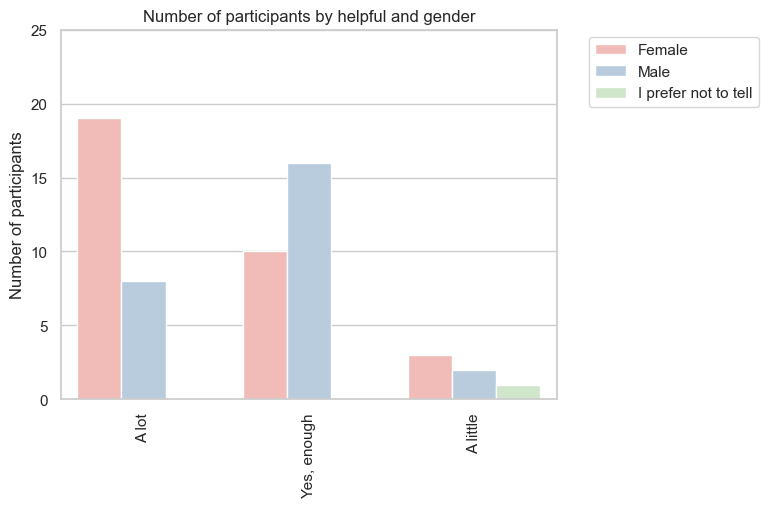

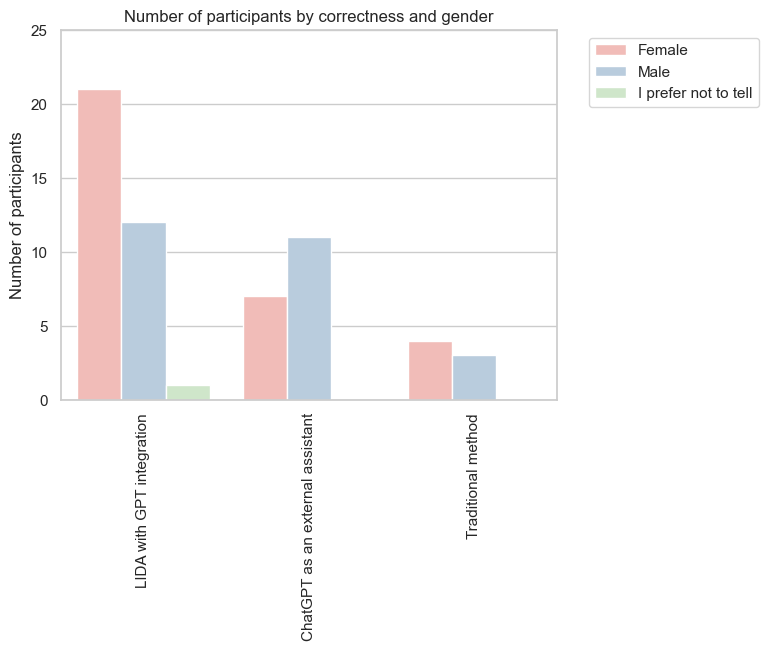

In [92]:
# Bar charts by gender

for col in df.columns.drop("Gender"):
  bar_chart_hue(df, col, "Gender")

## Bar charts by affiliation

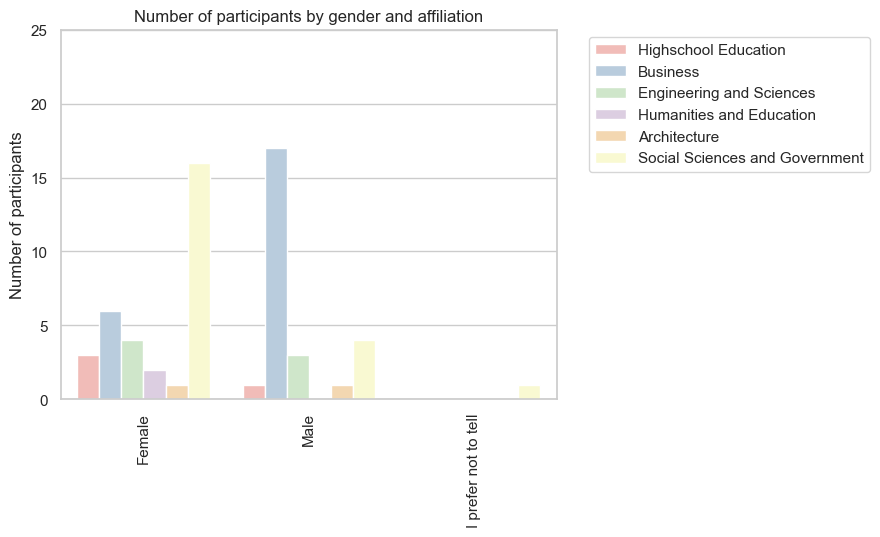

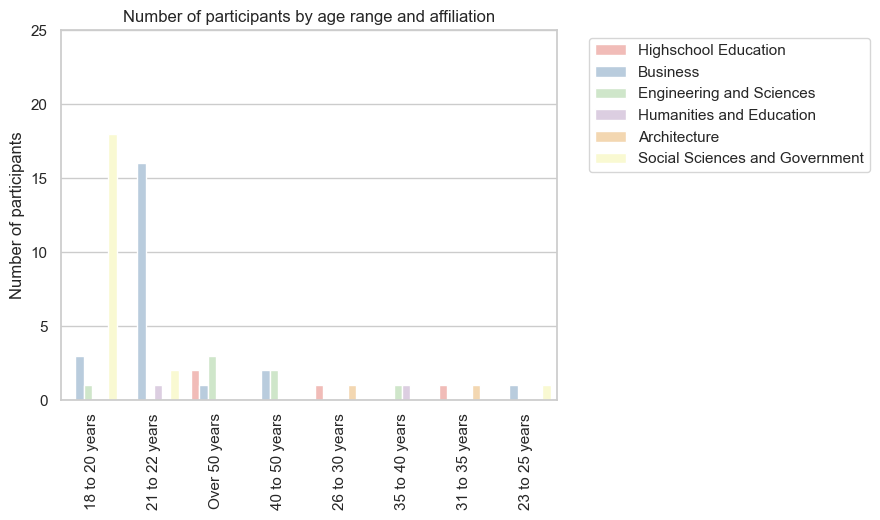

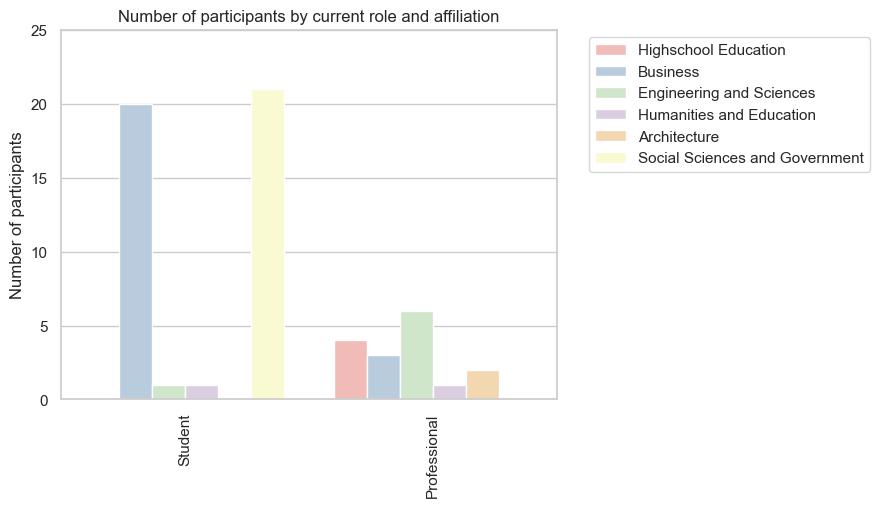

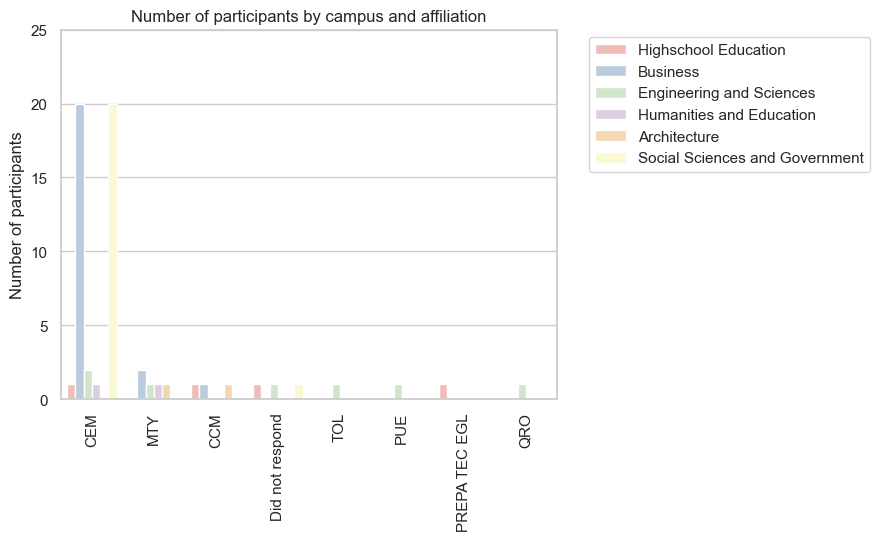

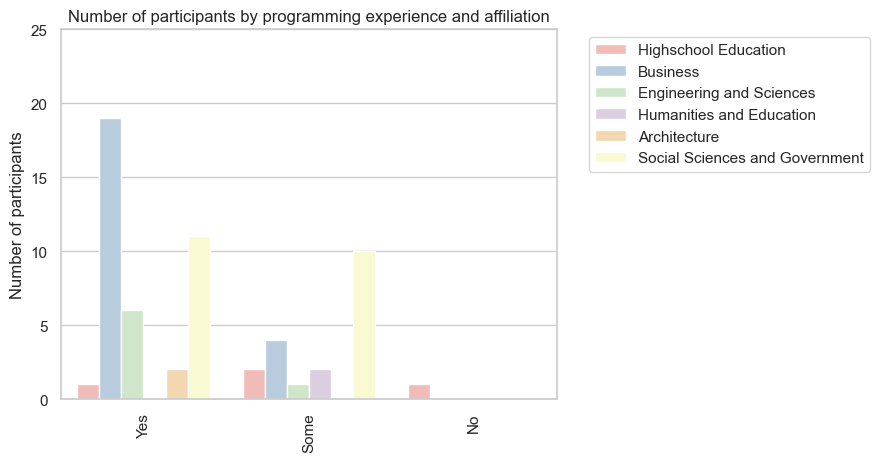

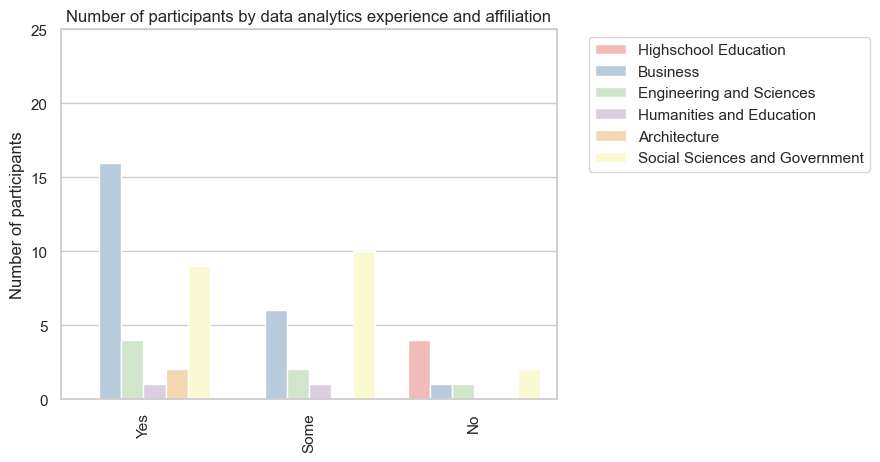

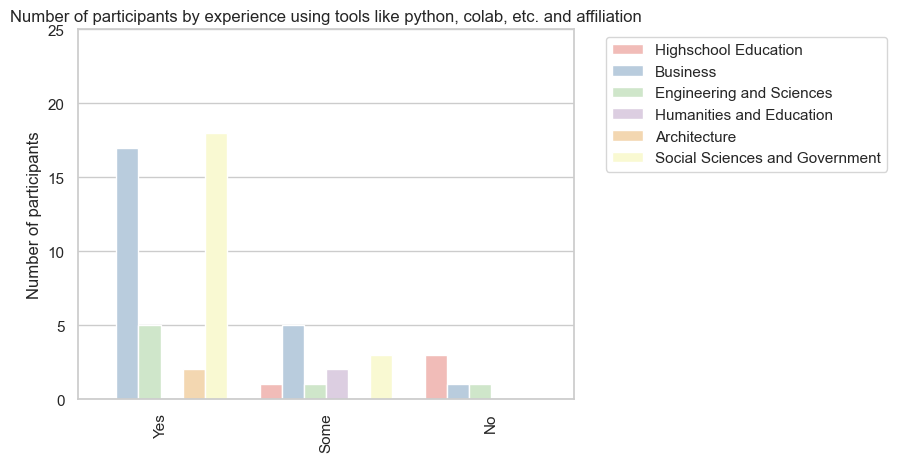

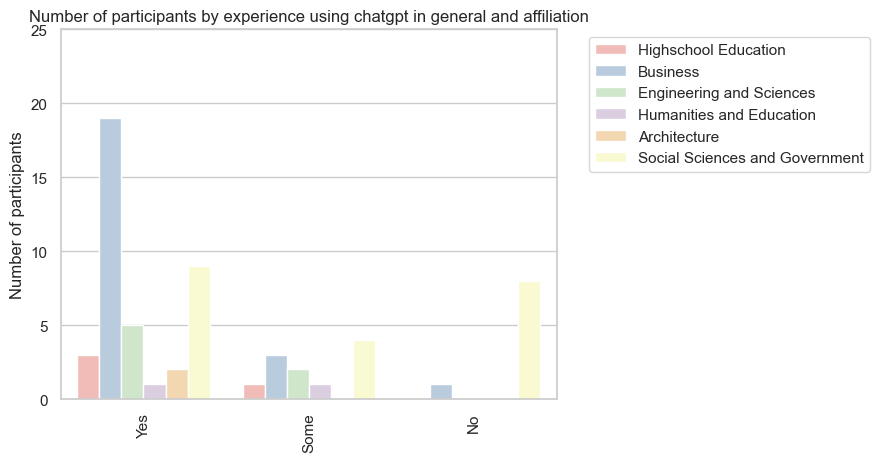

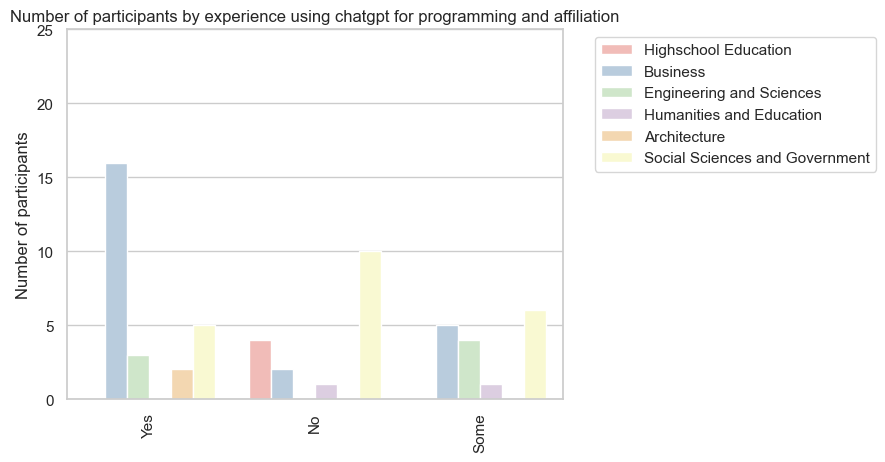

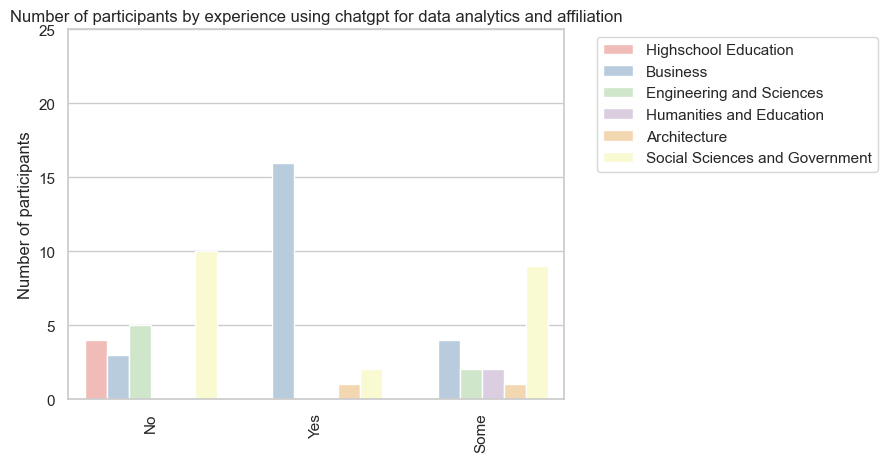

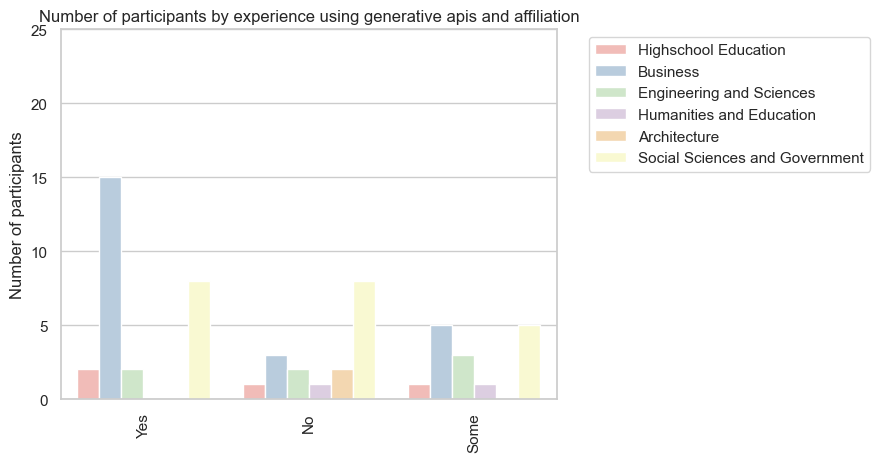

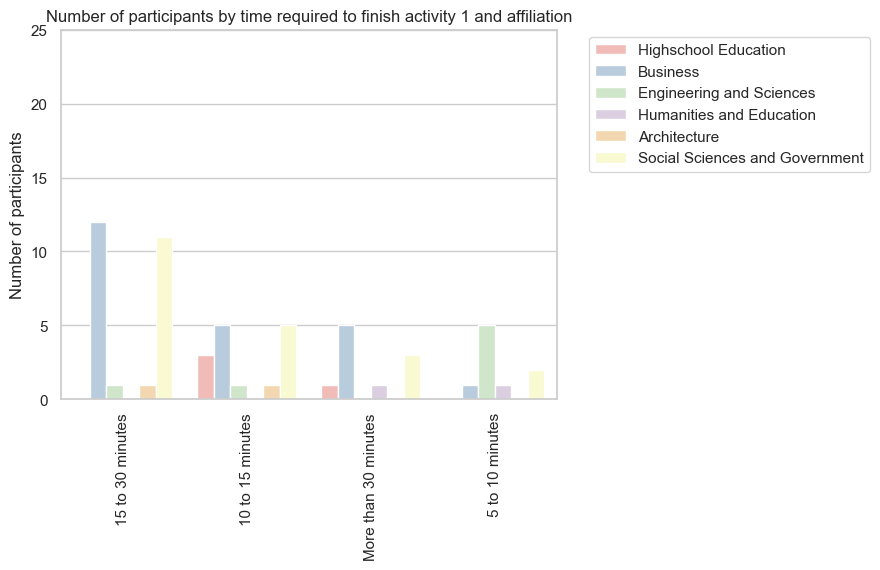

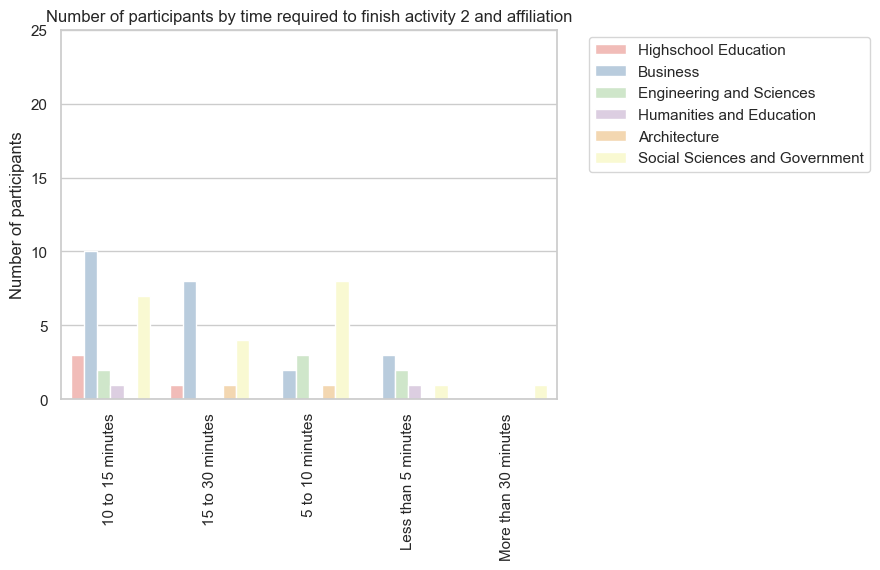

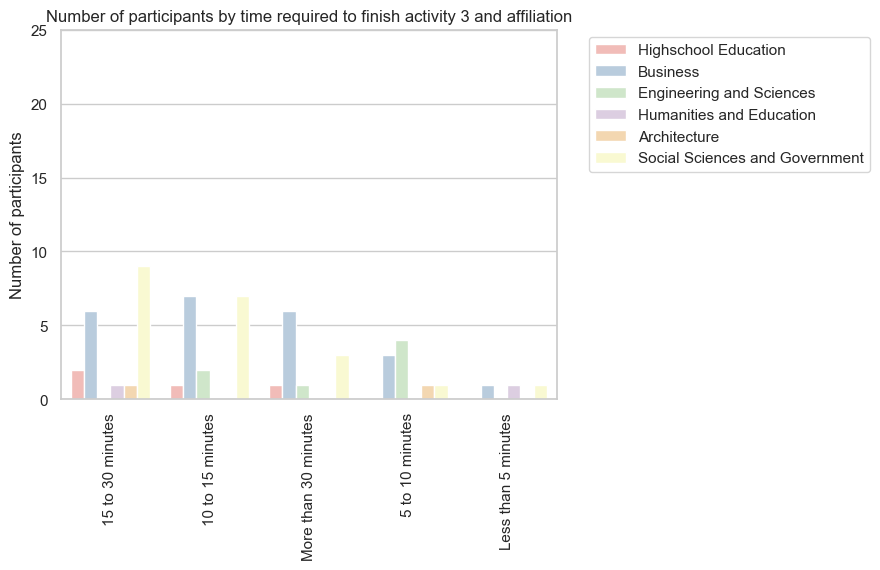

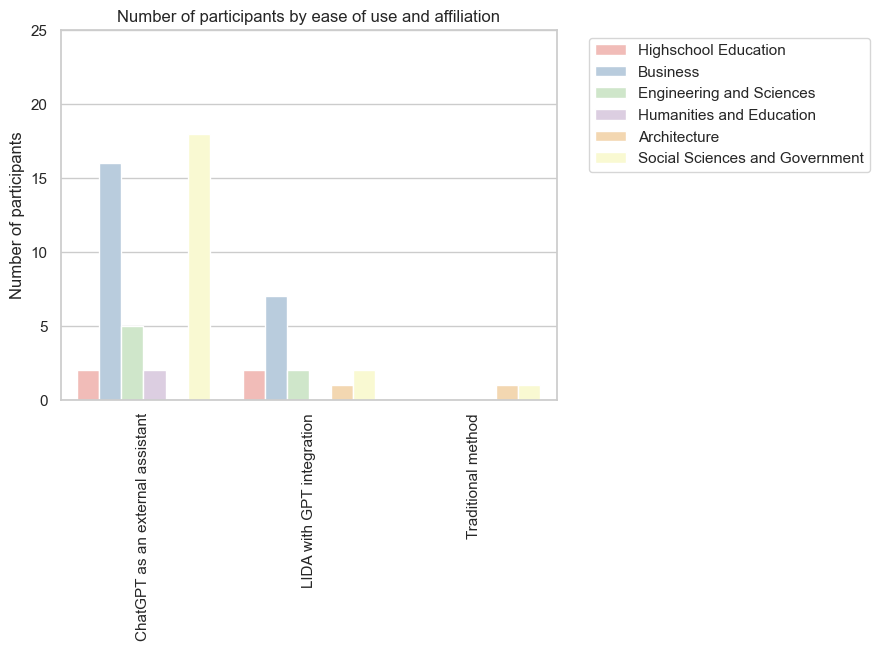

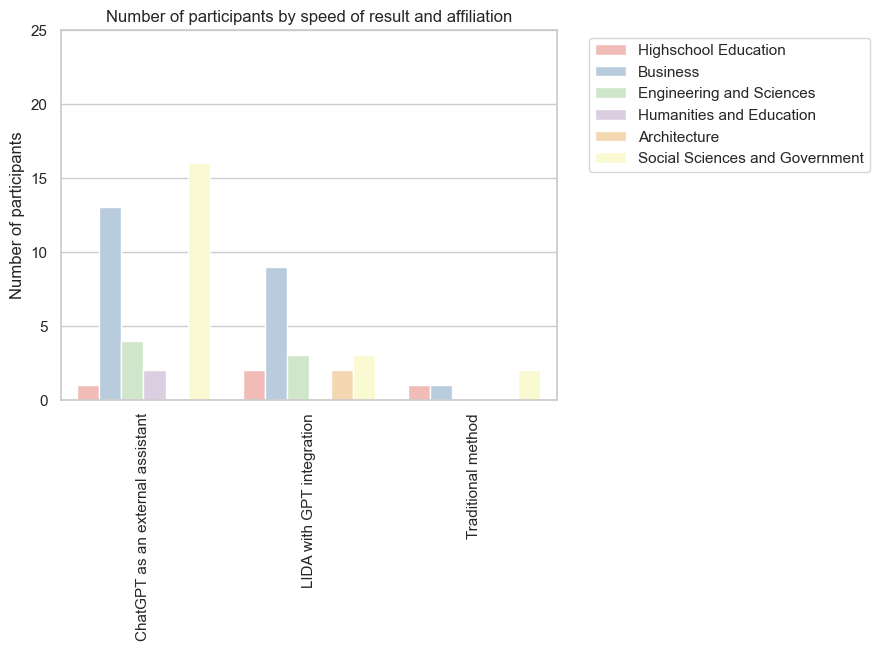

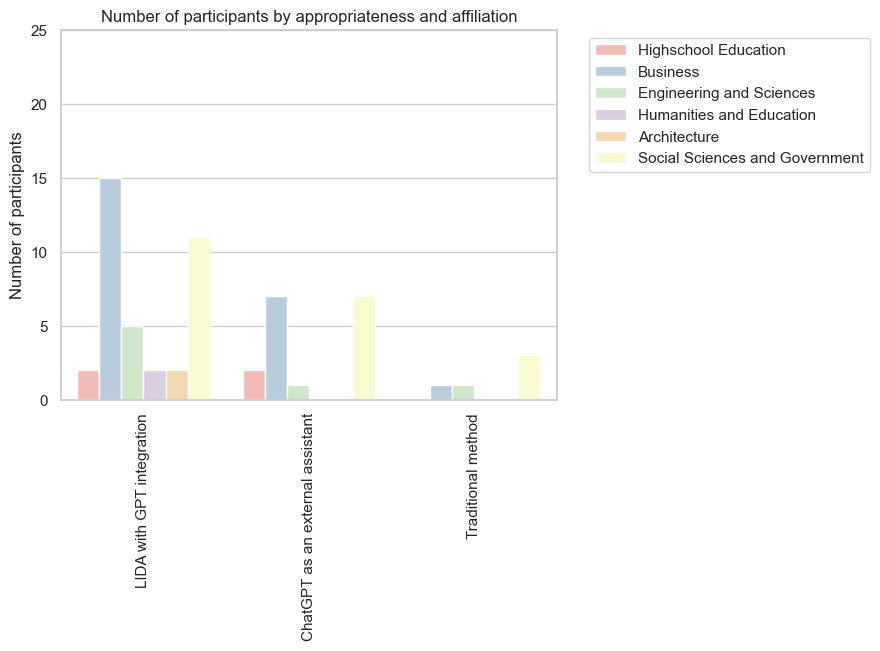

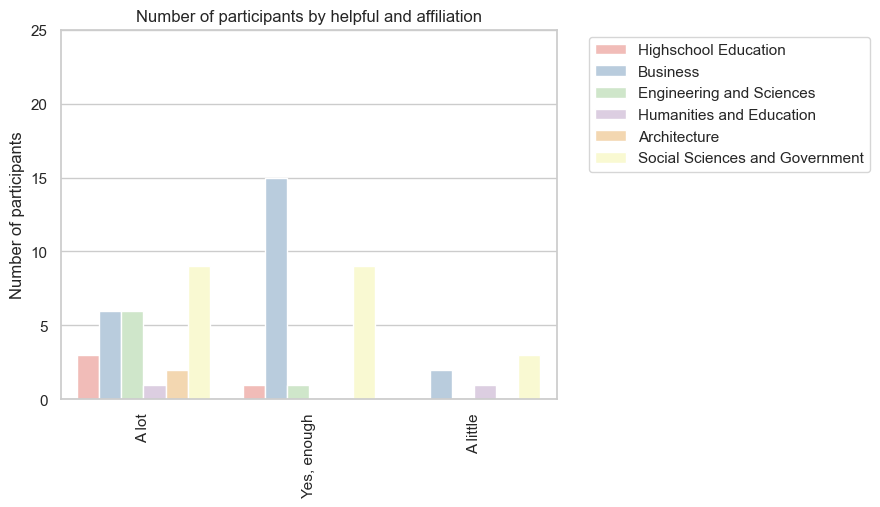

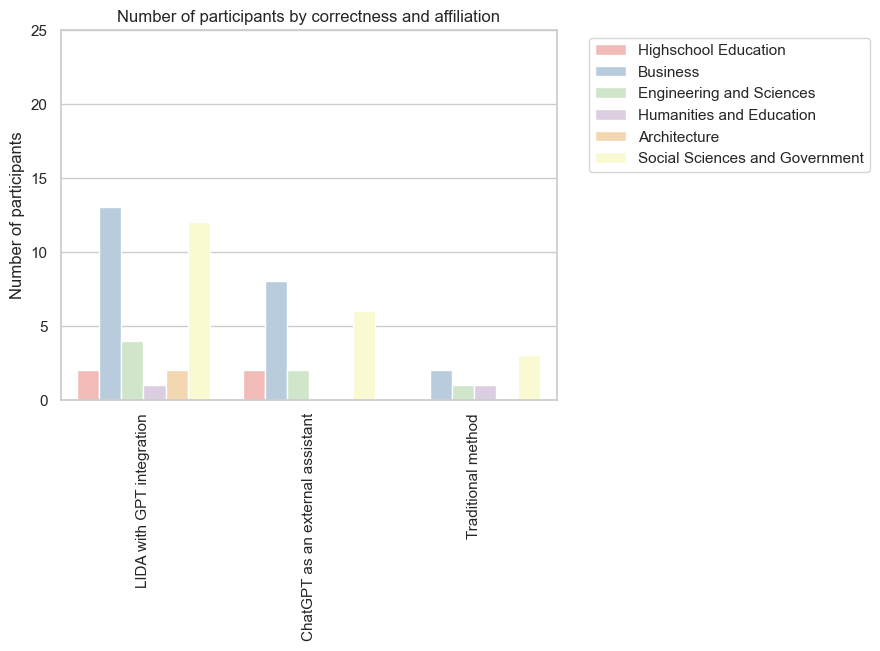

In [93]:
# Bar charts by Affiliation
for col in df.columns.drop("Affiliation"):
  bar_chart_hue(df, col, "Affiliation")

## Lollipop charts

In [94]:
def metrics_chart(df, column, column_colors, excluded, metrics, options, title=True, article_image=False):
    df_metrics = {}
    for value in df[column].unique():
        df_temp = df[df[column]==value].melt(value_vars=metrics, var_name="Metric", value_name="Answer").value_counts().reset_index().rename(columns={"count": "People"})
        for m in metrics:
            for o in options:
                if len(df_temp[(df_temp["Metric"] == m) & (df_temp["Answer"] == o)]) == 0:
                    df_temp = df_temp._append({"Metric": m, "Answer": o, "People": 0}, ignore_index=True)
                    df_temp["Metric"] = pd.Categorical(df_temp["Metric"], ordered=True, categories=metrics)
                    df_temp["Answer"] = pd.Categorical(df_temp["Answer"], ordered=True, categories=options)
                    df_temp = df_temp.sort_values(by=["Metric", "Answer"], ascending=False)
        df_metrics[value] = df_temp
    colors = {val:sns.color_palette("Set2").as_hex()[pos] for pos, val in enumerate(df_metrics[df[column][0]]["Metric"].unique())}

    fig = plt.figure(figsize=(14,10))
    plt_range = range(1, len(df_metrics[df[column][0]])+1)
    plt.hlines(y=plt_range, xmin=df_metrics[df[column].unique()[0]]["People"], xmax=df_metrics[df[column].unique()[1]]["People"], color=df_metrics[df[column][0]]["Metric"].apply(lambda x: colors[x]), linewidth=3)
    for i in range(1,len(metrics)):
        plt.axhline(y= i*len(metrics) + 0.5, color='black', linestyle='--', alpha=0.3, linewidth=3)
    for pos, val in enumerate(df[column].unique()):
        if val not in excluded:
            plt.scatter(df_metrics[val]["People"], plt_range, label=val, color=column_colors[pos], zorder=3)
    plt.yticks(plt_range, df_metrics[df[column].unique()[0]]["Answer"])
    plt.xlabel("Number of participants")
    lines = [Line2D([0], [0], color=colors[x], label = x, linewidth=3) for x in metrics]
    handles, labels = plt.gca().get_legend_handles_labels()
    plt.legend(lines + handles, metrics + labels, ncol=1, bbox_to_anchor=(1.01, 0.5), loc="center left", frameon=False)
    plt.title(f"Metrics evaluation by {column.lower()}" if title else "", fontsize=20)
    plt.tight_layout()
    plt.show()
    path = "Lollipop" if not article_image else "Journal"
    fig.savefig(f"images/{path}/Lollipop - Metrics evaluation by {column.lower()}.png", bbox_inches='tight')


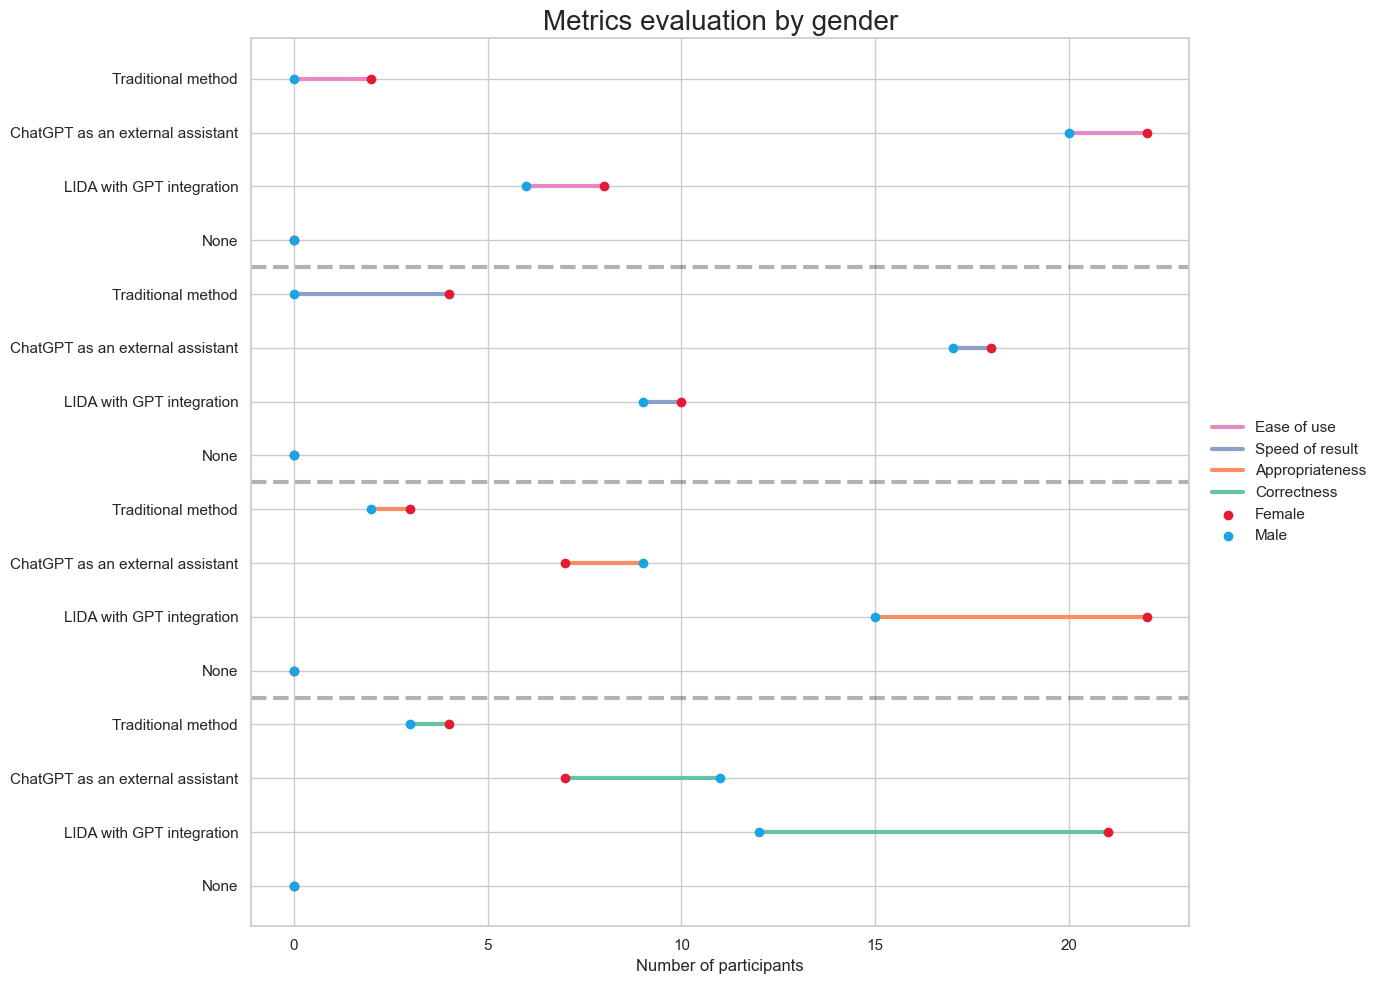

In [95]:
metrics = ["Ease of use", "Speed of result", "Appropriateness", "Correctness"]
options = ["Traditional method", "ChatGPT as an external assistant", "LIDA with GPT integration", "None"]
column_colors = ["#e31b33", "#1ba4e3"]
metrics_chart(df, "Gender", column_colors, ["I prefer not to tell"], metrics, options)

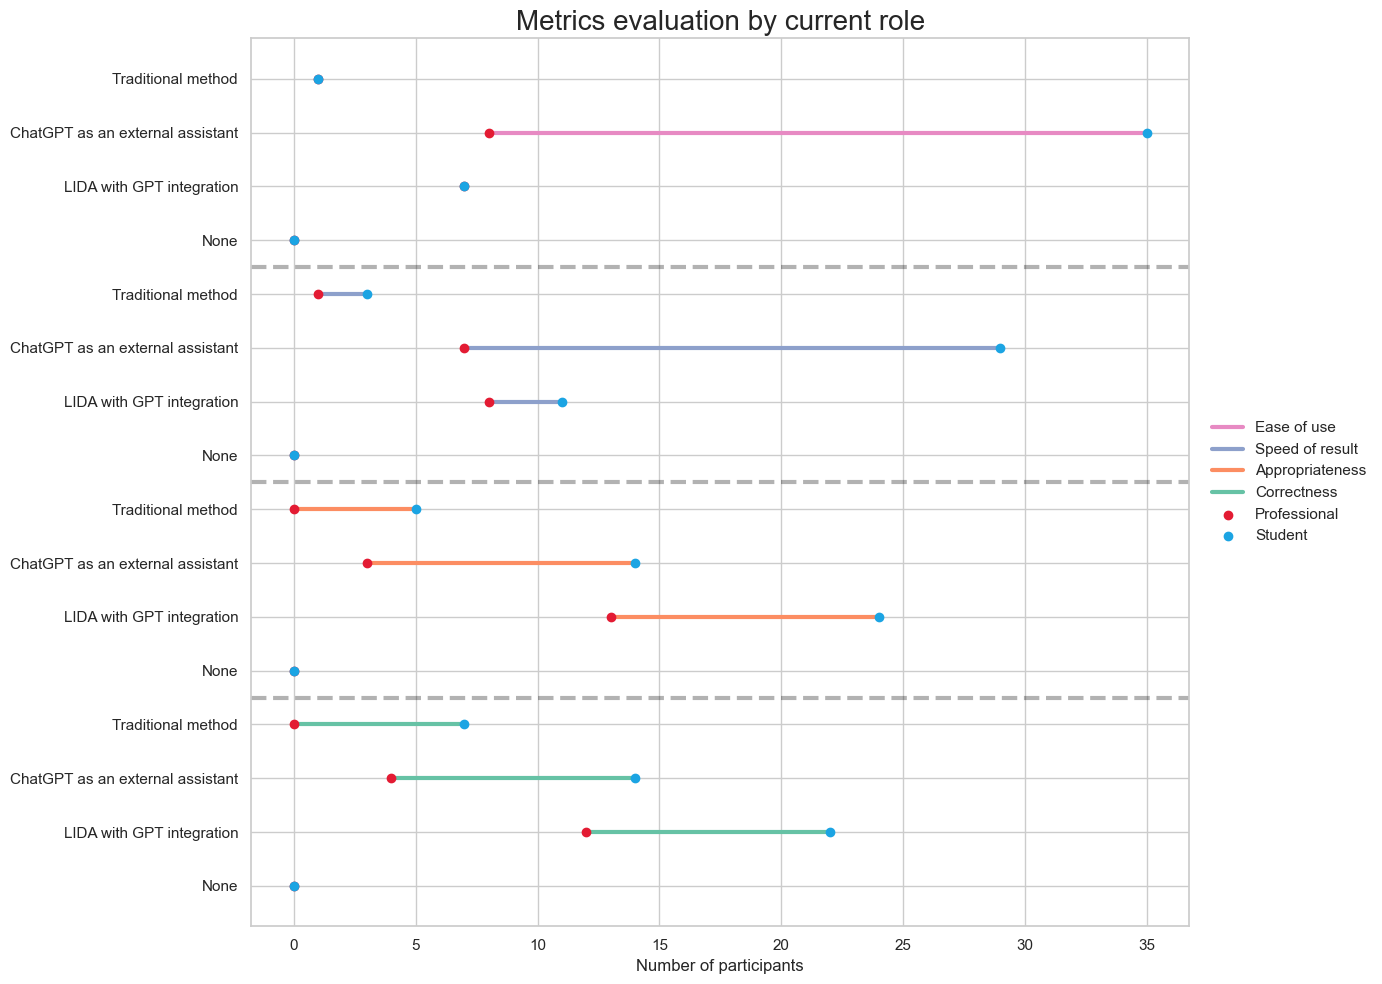

In [96]:
metrics_chart(df, "Current role", column_colors, [], metrics, options)

## Scatter plots

In [97]:
def scatter_plot(df, column, excluded, metrics, time_order):
    df_scatter = df.melt(id_vars=column,
                         value_vars=metrics,
                         var_name="Activity",
                         value_name="Time")
    df_scatter["Activity"] = df_scatter["Activity"].str.replace("Time required to finish ", "").str.title()
    df_scatter = df_scatter[~df_scatter[column].isin(excluded)]
    time_order = {activity: pos for pos, activity in enumerate(time_order)}
    df_scatter = df_scatter.sort_values(by=["Time"], key=lambda x: x.map(time_order))
    g = sns.catplot(data=df_scatter,
                    x=column,
                    y = "Time",
                    col="Activity",
                    kind="swarm",
                    height=5)
    g.set_axis_labels("", "Time required to finish the activity")
    g.set_titles("{col_name}")
    g.fig.suptitle(f"Time required to finish activities by {column.lower()}", y=1.05)
    plt.show()

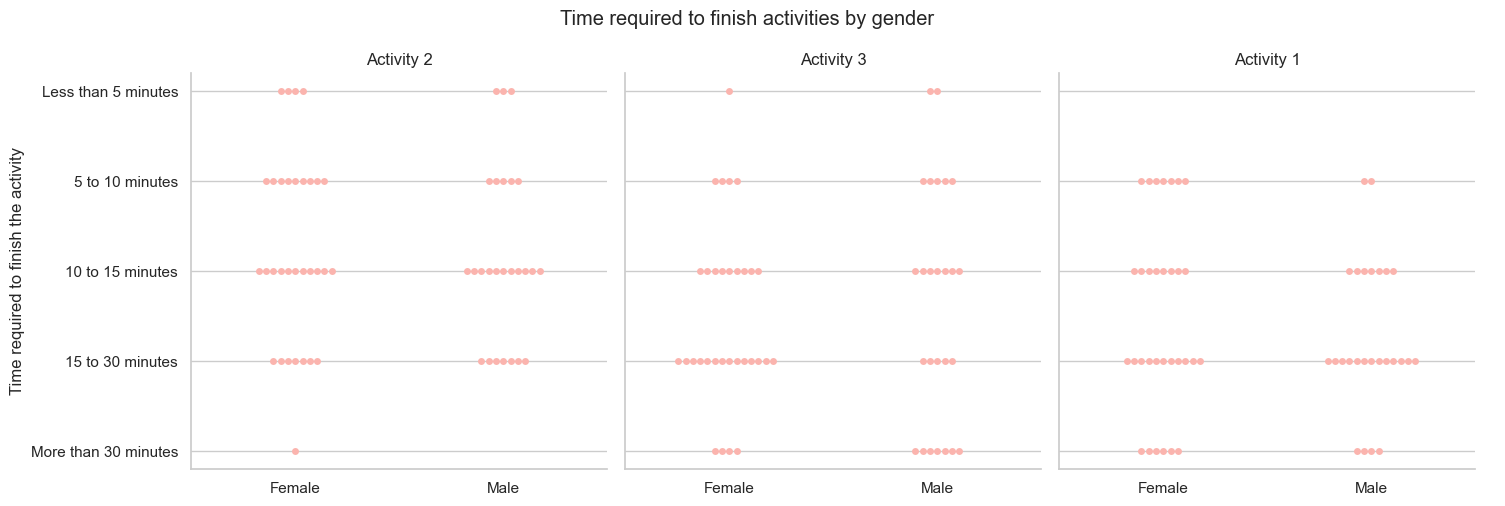

In [98]:
excluded = ["I prefer not to tell"]
metrics = ["Time required to finish activity 1", "Time required to finish activity 2", "Time required to finish activity 3"]
time_order = ["Less than 5 minutes", "5 to 10 minutes", "10 to 15 minutes", "15 to 30 minutes", "More than 30 minutes"]
scatter_plot(df, "Gender", excluded, metrics, time_order)

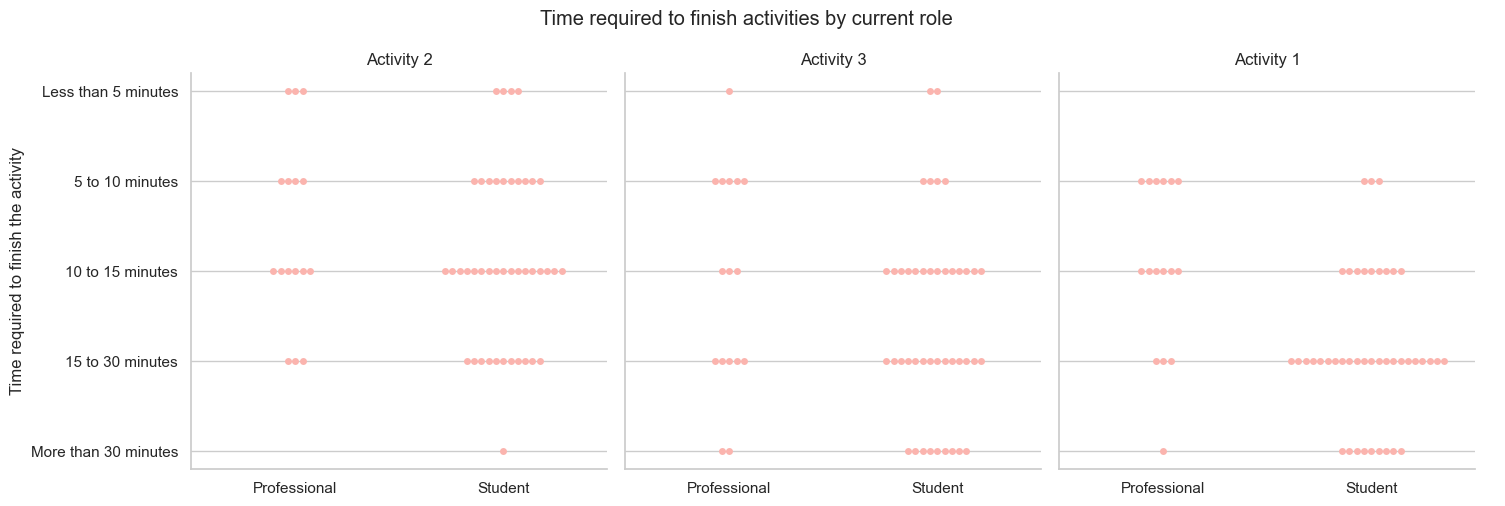

In [99]:
metrics = ["Time required to finish activity 1", "Time required to finish activity 2", "Time required to finish activity 3"]
scatter_plot(df, "Current role", [], metrics, time_order)

## Radar charts

In [100]:
metrics = ["Ease of use", "Speed of result", "Appropriateness", "Correctness"]
df_metrics = df.melt(value_vars=metrics, var_name="Metric", value_name="Answer").value_counts().reset_index().rename(columns={"count": "People"})
df_metrics = df_metrics.sort_values(by=["Metric", "Answer"], ascending=False)
min = df_metrics["People"].min()
max = df_metrics["People"].max()

ranges = [min, max]

df_metrics_filtered = df_metrics[~df_metrics["Answer"].isin(['None'])]
answers = df_metrics_filtered["Answer"].unique()
metrics = df_metrics_filtered["Metric"].unique()

fig = go.Figure()
for answer in answers:
    fig.add_trace(go.Scatterpolar(
        r=df_metrics_filtered[df_metrics_filtered["Answer"]==answer]["People"],
        theta=metrics,
        fill='toself',
        name=answer
        ))

fig.update_layout(
    title=f"Metric evaluation for participants",
    legend_title="Answer",
    width=1100,
    height=800,
    polar=dict(
        radialaxis=dict(
        visible=True,
        range=ranges
        )),
    showlegend=True,    
    )

fig.show()
fig.write_image(f"images/Radar/Radar - Metric evaluation for participants.png")

C:\Users\aramg\AppData\Local\Temp\ipykernel_27048\106641389.py:13: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



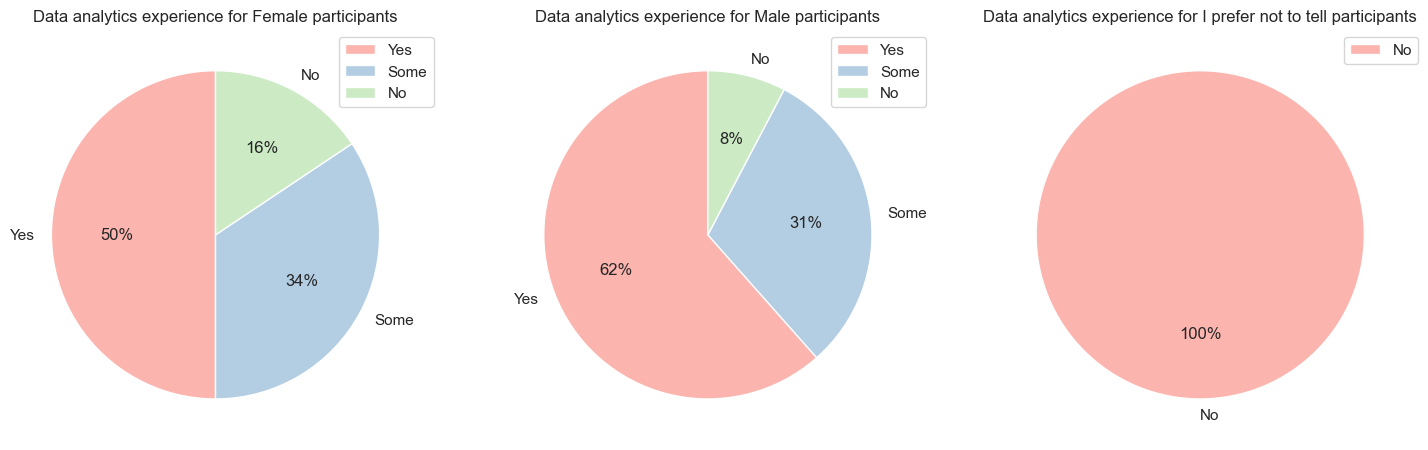

In [101]:
programming_exp_gender = df.groupby('Gender')['Data analytics experience'].value_counts().fillna(0).reset_index()

fig, ax = plt.subplots(1, 3, figsize=(18, 6))

for idx, gender in enumerate(df["Gender"].unique()):
    df_pie = programming_exp_gender.query(f'Gender == "{gender}"')
    labels = df_pie['Data analytics experience']
    values = df_pie['count']

    ax[idx].pie(values, labels=labels, startangle=90, autopct='%1.0f%%')
    ax[idx].set_title(f"Data analytics experience for {gender} participants")
    ax[idx].legend(loc='upper right', bbox_to_anchor=(1.05, 1))
fig.show()
fig.savefig("images/Pie/Pie - Data analytics experience for participants by gender.png")

C:\Users\aramg\AppData\Local\Temp\ipykernel_27048\3875204131.py:13: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



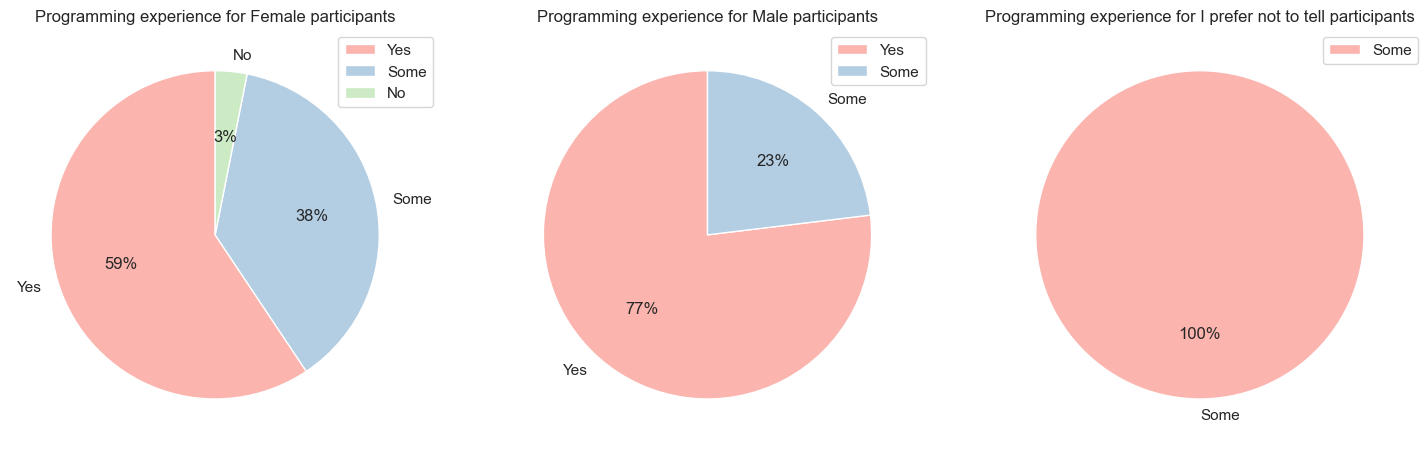

In [102]:
programming_exp_gender = df.groupby('Gender')['Programming experience'].value_counts().fillna(0).reset_index()

fig, ax = plt.subplots(1, 3, figsize=(18, 6))

for idx, gender in enumerate(df["Gender"].unique()):
    df_pie = programming_exp_gender.query(f'Gender == "{gender}"')
    labels = df_pie['Programming experience']
    values = df_pie['count']

    ax[idx].pie(values, labels=labels, startangle=90, autopct='%1.0f%%')
    ax[idx].set_title(f"Programming experience for {gender} participants")
    ax[idx].legend(loc='upper right', bbox_to_anchor=(1.05, 1))
fig.show()
fig.savefig("images/Pie/Pie - Programming experience for participants by gender.png")

## Time required to finish the activities

In [103]:
display(df['Time required to finish activity 1'].value_counts(normalize=True))
display(df['Time required to finish activity 2'].value_counts(normalize=True))
display(df['Time required to finish activity 3'].value_counts(normalize=True))

Time required to finish activity 1
15 to 30 minutes        0.423729
10 to 15 minutes        0.254237
More than 30 minutes    0.169492
5 to 10 minutes         0.152542
Name: proportion, dtype: float64

Time required to finish activity 2
10 to 15 minutes        0.389831
15 to 30 minutes        0.237288
5 to 10 minutes         0.237288
Less than 5 minutes     0.118644
More than 30 minutes    0.016949
Name: proportion, dtype: float64

Time required to finish activity 3
15 to 30 minutes        0.322034
10 to 15 minutes        0.288136
More than 30 minutes    0.186441
5 to 10 minutes         0.152542
Less than 5 minutes     0.050847
Name: proportion, dtype: float64

In [104]:
display(df.query('Gender != "I prefer not to tell"').groupby(['Gender', 'Programming experience'])['Time required to finish activity 1'].value_counts())
display(df.query('Gender != "I prefer not to tell"').groupby(['Gender', 'Programming experience'])['Time required to finish activity 2'].value_counts())
display(df.query('Gender != "I prefer not to tell"').groupby(['Gender', 'Programming experience'])['Time required to finish activity 3'].value_counts())

Gender  Programming experience  Time required to finish activity 1
Female  No                      10 to 15 minutes                      1
        Some                    More than 30 minutes                  4
                                10 to 15 minutes                      3
                                15 to 30 minutes                      3
                                5 to 10 minutes                       2
        Yes                     15 to 30 minutes                      8
                                5 to 10 minutes                       5
                                10 to 15 minutes                      4
                                More than 30 minutes                  2
Male    Some                    15 to 30 minutes                      5
                                More than 30 minutes                  1
        Yes                     15 to 30 minutes                      8
                                10 to 15 minutes                     

Gender  Programming experience  Time required to finish activity 2
Female  No                      15 to 30 minutes                      1
        Some                    10 to 15 minutes                      7
                                15 to 30 minutes                      2
                                5 to 10 minutes                       1
                                Less than 5 minutes                   1
                                More than 30 minutes                  1
        Yes                     5 to 10 minutes                       8
                                10 to 15 minutes                      4
                                15 to 30 minutes                      4
                                Less than 5 minutes                   3
Male    Some                    10 to 15 minutes                      2
                                15 to 30 minutes                      2
                                5 to 10 minutes                      

Gender  Programming experience  Time required to finish activity 3
Female  No                      15 to 30 minutes                      1
        Some                    15 to 30 minutes                      6
                                10 to 15 minutes                      3
                                More than 30 minutes                  2
                                Less than 5 minutes                   1
        Yes                     15 to 30 minutes                      7
                                10 to 15 minutes                      6
                                5 to 10 minutes                       4
                                More than 30 minutes                  2
Male    Some                    10 to 15 minutes                      2
                                More than 30 minutes                  2
                                15 to 30 minutes                      1
                                5 to 10 minutes                      

In [105]:
display(df.query('Gender != "I prefer not to tell"').groupby(['Gender', 'Programming experience'])['Time required to finish activity 1'].value_counts(normalize=True))
display(df.query('Gender != "I prefer not to tell"').groupby(['Gender', 'Programming experience'])['Time required to finish activity 2'].value_counts(normalize=True))
display(df.query('Gender != "I prefer not to tell"').groupby(['Gender', 'Programming experience'])['Time required to finish activity 3'].value_counts(normalize=True))

Gender  Programming experience  Time required to finish activity 1
Female  No                      10 to 15 minutes                      1.000000
        Some                    More than 30 minutes                  0.333333
                                10 to 15 minutes                      0.250000
                                15 to 30 minutes                      0.250000
                                5 to 10 minutes                       0.166667
        Yes                     15 to 30 minutes                      0.421053
                                5 to 10 minutes                       0.263158
                                10 to 15 minutes                      0.210526
                                More than 30 minutes                  0.105263
Male    Some                    15 to 30 minutes                      0.833333
                                More than 30 minutes                  0.166667
        Yes                     15 to 30 minutes                

Gender  Programming experience  Time required to finish activity 2
Female  No                      15 to 30 minutes                      1.000000
        Some                    10 to 15 minutes                      0.583333
                                15 to 30 minutes                      0.166667
                                5 to 10 minutes                       0.083333
                                Less than 5 minutes                   0.083333
                                More than 30 minutes                  0.083333
        Yes                     5 to 10 minutes                       0.421053
                                10 to 15 minutes                      0.210526
                                15 to 30 minutes                      0.210526
                                Less than 5 minutes                   0.157895
Male    Some                    10 to 15 minutes                      0.333333
                                15 to 30 minutes                

Gender  Programming experience  Time required to finish activity 3
Female  No                      15 to 30 minutes                      1.000000
        Some                    15 to 30 minutes                      0.500000
                                10 to 15 minutes                      0.250000
                                More than 30 minutes                  0.166667
                                Less than 5 minutes                   0.083333
        Yes                     15 to 30 minutes                      0.368421
                                10 to 15 minutes                      0.315789
                                5 to 10 minutes                       0.210526
                                More than 30 minutes                  0.105263
Male    Some                    10 to 15 minutes                      0.333333
                                More than 30 minutes                  0.333333
                                15 to 30 minutes                

## Radar plots

In [106]:
for activity in [f'Time required to finish activity {i}' for i in range(1, 4)]:
    ranges = [0, 16]
    df_activity_general = df.query('Gender != "I prefer not to tell"').groupby(['Data analytics experience'])[activity].value_counts().reset_index()

    answers = df_activity_general["Data analytics experience"].unique()
    metrics = df_activity_general[activity].unique()

    fig = go.Figure()
    for answer in answers:
        fig.add_trace(go.Scatterpolar(
                r=df_activity_general[df_activity_general["Data analytics experience"]==answer]["count"],
                theta=metrics,
                fill='toself',
                name=answer
        ))

    fig.update_layout(
    title=f"{activity} based on Data analytics experience",
    legend_title="Answer",
    width=700,
    height=600,
    polar=dict(
        radialaxis=dict(
        visible=True,
        range=ranges
        )),
    showlegend=True
    )

    fig.show()
    fig.write_image(f"images/Radar/Radar - {activity} based on Data analytics experience.png")


In [107]:
for activity in [f'Time required to finish activity {i}' for i in range(1, 4)]:
    ranges = [0, 16]
    df_activity_general = df.query('Gender != "I prefer not to tell"').groupby(['Programming experience'])[activity].value_counts().reset_index()

    answers = df_activity_general["Programming experience"].unique()
    metrics = df_activity_general[activity].unique()

    fig = go.Figure()
    for answer in answers:
        fig.add_trace(go.Scatterpolar(
                r=df_activity_general[df_activity_general["Programming experience"]==answer]["count"],
                theta=metrics,
                fill='toself',
                name=answer
        ))

    fig.update_layout(
    title=f"{activity} based on programming experience",
    legend_title="Answer",
    width=700,
    height=600,
    polar=dict(
        radialaxis=dict(
        visible=True,
        range=ranges
        )),
    showlegend=True
    )

    fig.show()
    fig.write_image(f"images/Radar/Radar - {activity} based on programming experience.png")
        

In [108]:
for activity in [f'Time required to finish activity {i}' for i in range(1, 4)]:
  ranges = [0, 7]
  df_activity = df.query('Gender != "I prefer not to tell"').groupby(['Gender', 'Data analytics experience'])[activity].value_counts().reset_index()

  for gender in df_activity["Gender"].unique():

    df_filtered = df_activity.query(f'Gender == "{gender}"')
    answers = df_filtered["Data analytics experience"].unique()
    metrics = df_filtered[activity].unique()

    fig = go.Figure()
    for answer in answers:
      fig.add_trace(go.Scatterpolar(
            r=df_filtered[df_filtered["Data analytics experience"]==answer]["count"],
            theta=metrics,
            fill='toself',
            name=answer
      ))

    fig.update_layout(
      title=f"{activity} for {gender} participants based on\n Data analytics experience",
      legend_title="Answer",
      width=850,
      height=600,
      polar=dict(
        radialaxis=dict(
          visible=True,
          range=ranges
        )),
      showlegend=True
    )

    fig.show()
    fig.write_image(f"images/Radar/Radar - {activity} for {gender} participants based on Data analytics experience.png")


In [109]:
for activity in [f'Time required to finish activity {i}' for i in range(1, 4)]:
  ranges = [0, 9]
  df_activity = df.query('Gender != "I prefer not to tell"').groupby(['Gender', 'Programming experience'])[activity].value_counts().reset_index()

  for gender in df_activity["Gender"].unique():

    df_filtered = df_activity.query(f'Gender == "{gender}"')
    answers = df_filtered["Programming experience"].unique()
    metrics = df_filtered[activity].unique()

    fig = go.Figure()
    for answer in answers:
      fig.add_trace(go.Scatterpolar(
            r=df_filtered[df_filtered["Programming experience"]==answer]["count"],
            theta=metrics,
            fill='toself',
            name=answer
      ))

    fig.update_layout(
      title=f"{activity} for {gender} participants based\n on programming experience",
      legend_title="Answer",
      width=700,
      height=600,
      polar=dict(
        radialaxis=dict(
          visible=True,
          range=ranges
        )),
      showlegend=True
    )

    fig.show()
    fig.write_image(f"images/Radar/Radar - {activity} for {gender} participants based on programming experience.png")

## Box plots

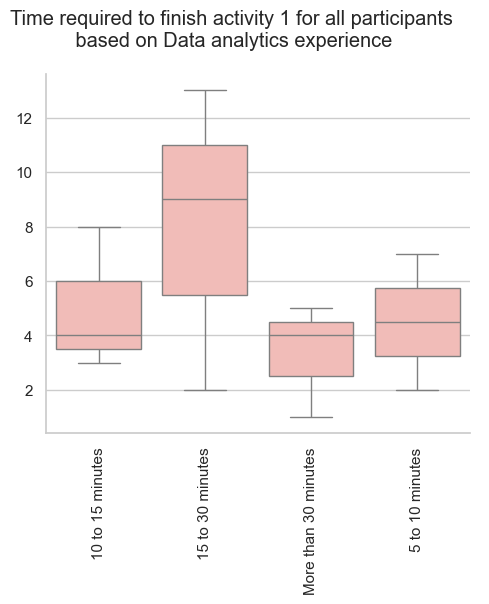

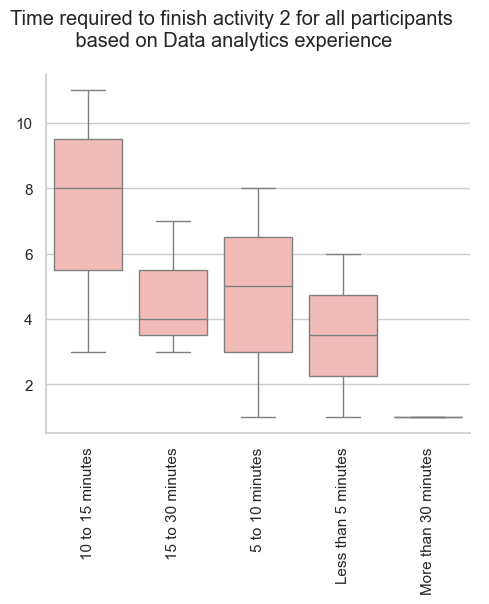

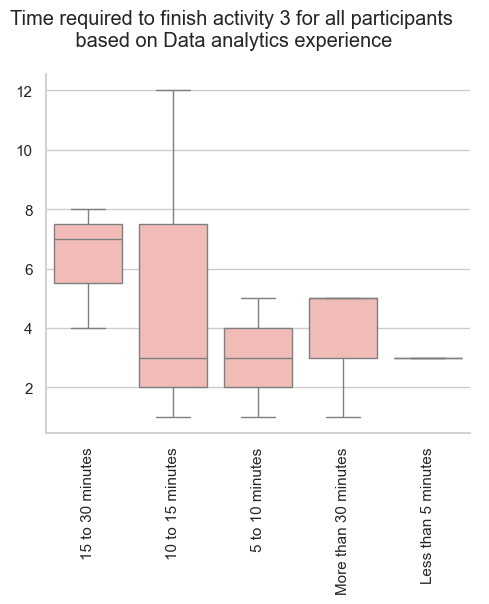

In [110]:
for activity in [f'Time required to finish activity {i}' for i in range(1, 4)]:
    df_activity = df.query('Gender != "I prefer not to tell"').groupby(['Data analytics experience'])[activity].value_counts().reset_index().rename(columns={'count': 'Count'})
    g = sns.catplot(data=df_activity, x=activity, y='Count', kind='box')
    g.set_xticklabels(rotation=90)
    g.figure.suptitle(f'{activity} for all participants\n based on Data analytics experience')
    g.figure.subplots_adjust(top=0.85)
    g.set_ylabels("")
    g.set_xlabels("")
    g.savefig(f"images/Box/Box - {activity} for all participants based on Data analytics experience.png")

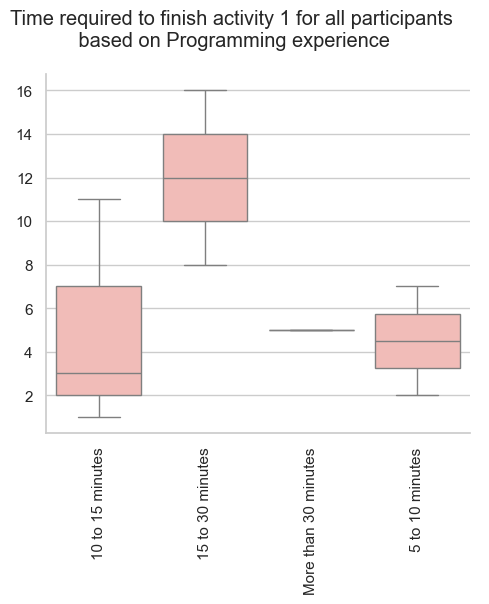

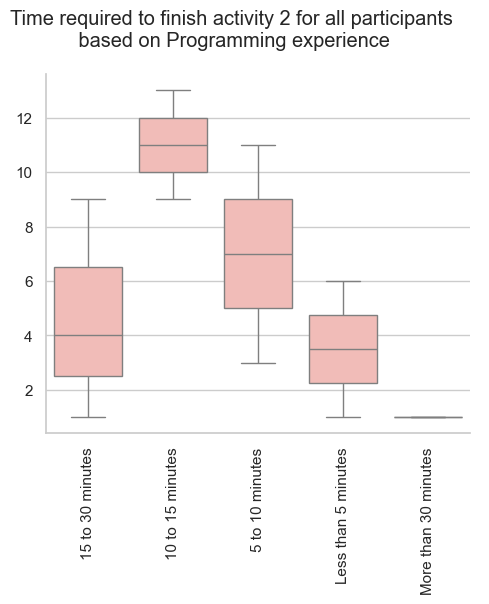

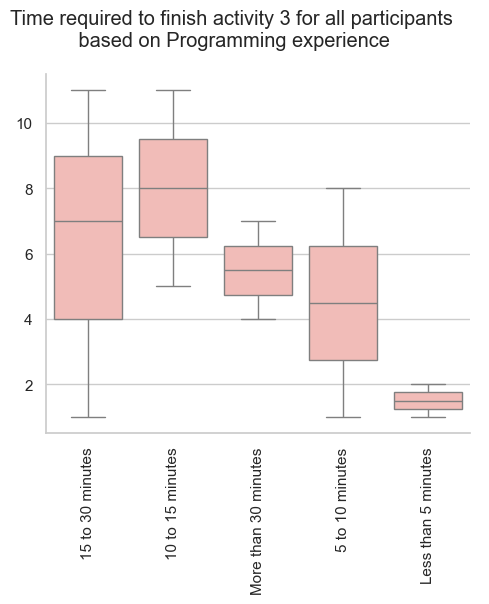

In [111]:
for activity in [f'Time required to finish activity {i}' for i in range(1, 4)]:
    df_activity = df.query('Gender != "I prefer not to tell"').groupby(['Programming experience'])[activity].value_counts().reset_index().rename(columns={'count': 'Count'})
    g = sns.catplot(data=df_activity, x=activity, y='Count', kind='box')
    g.set_xticklabels(rotation=90)
    g.figure.suptitle(f'{activity} for all participants\n based on Programming experience')
    g.figure.subplots_adjust(top=0.85)
    g.set_ylabels("")
    g.set_xlabels("")
    g.savefig(f"images/Box/Box - {activity} for all participants based on Programming experience.png")


In [112]:
df.columns

Index(['Gender', 'Age range', 'Current role', 'Campus', 'Affiliation',
       'Programming experience', 'Data analytics experience',
       'Experience using tools like Python, Colab, etc.',
       'Experience using ChatGPT in general',
       'Experience using ChatGPT for programming',
       'Experience using ChatGPT for data analytics',
       'Experience using generative APIs',
       'Time required to finish activity 1',
       'Time required to finish activity 2',
       'Time required to finish activity 3', 'Ease of use', 'Speed of result',
       'Appropriateness', 'Helpful', 'Correctness'],
      dtype='object')

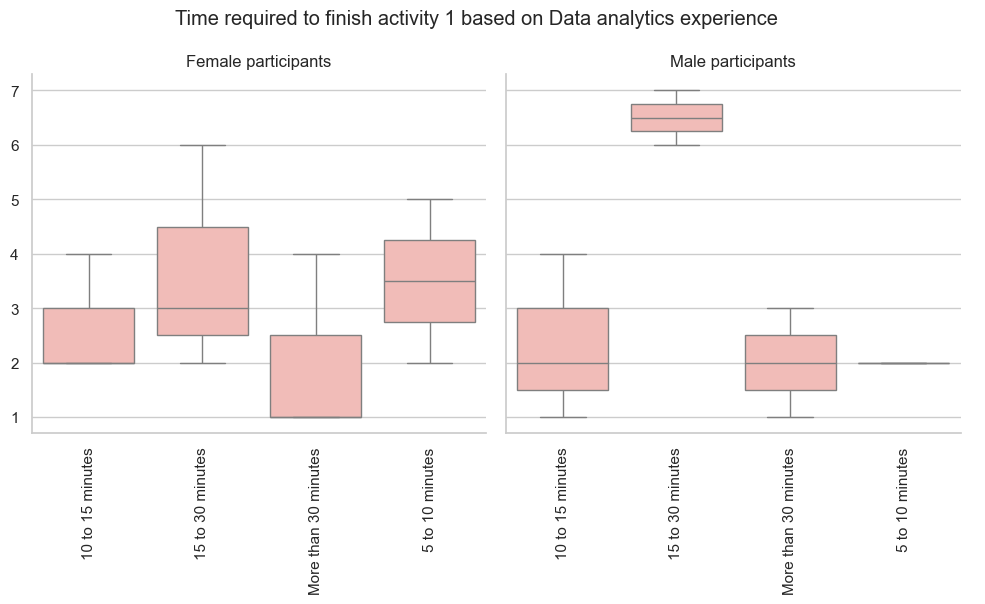

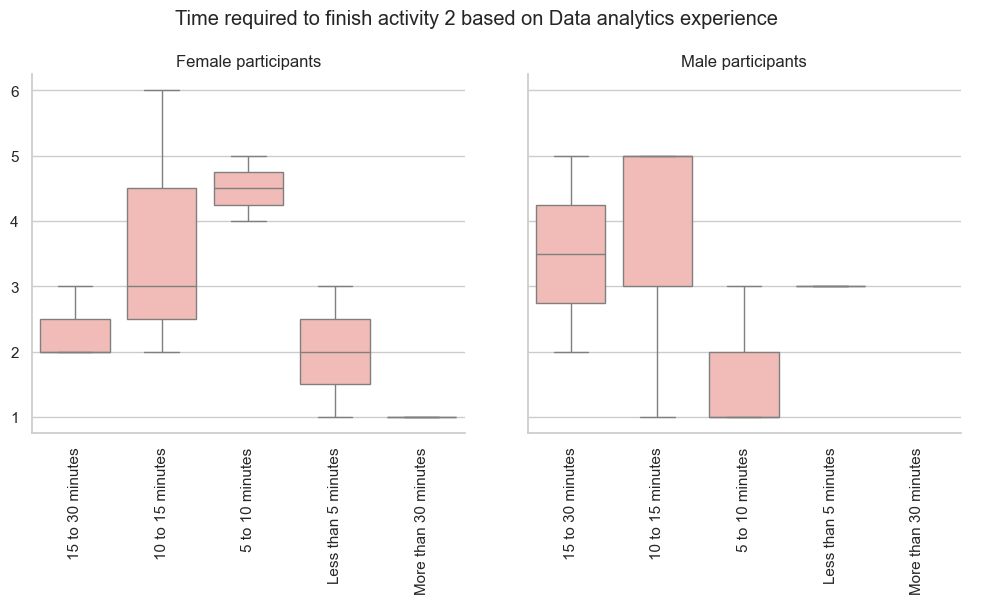

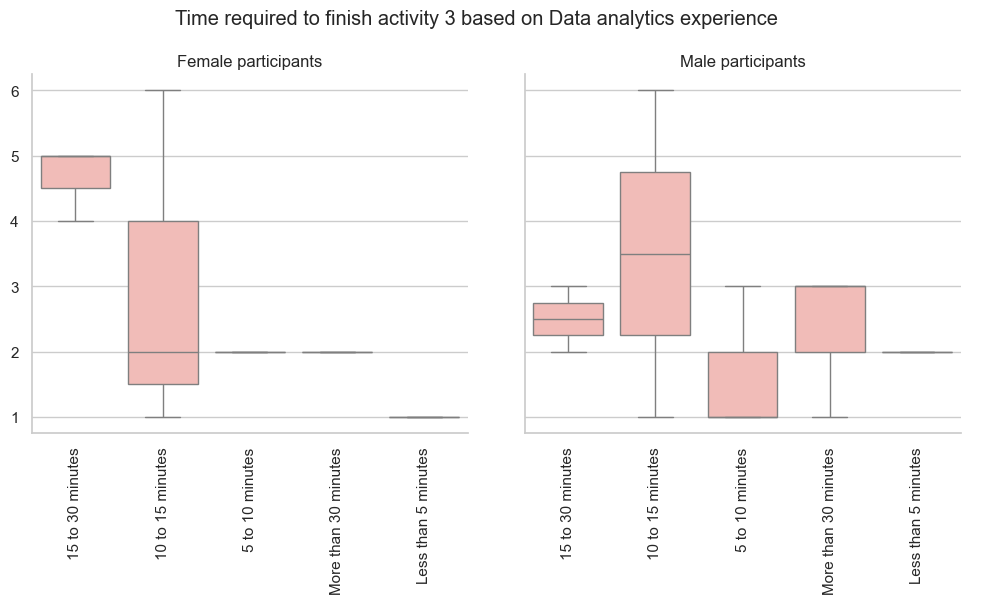

In [113]:
for activity in [f'Time required to finish activity {i}' for i in range(1, 4)]:
    df_activity = df.query('Gender != "I prefer not to tell"').groupby(['Gender', 'Data analytics experience'])[activity].value_counts().reset_index().rename(columns={'count': 'Count'})

    # df_activity_1 = df.query('Gender != "I prefer not to tell"').groupby(['Gender', 'Programming experience'])['Time required to finish activity 1'].value_counts().reset_index().rename(columns={'count': 'Count'})

    fig = sns.catplot(data=df_activity, x=activity, y='Count', col='Gender', kind='box')
    fig.set_xticklabels(rotation=90)
    fig.set_titles("{col_name} participants")
    fig.set_xlabels("")
    fig.figure.suptitle(f'{activity} based on Data analytics experience')
    fig.figure.subplots_adjust(top=0.85)
    fig.set_ylabels("")
    fig.savefig(f"images/Box/Box - {activity} based on Data analytics experience by gender.png")


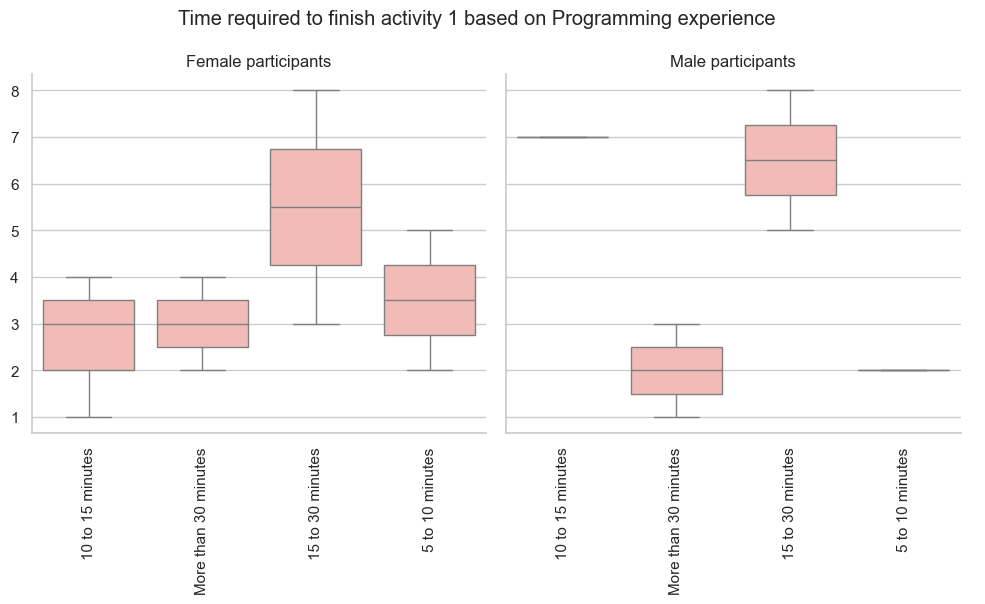

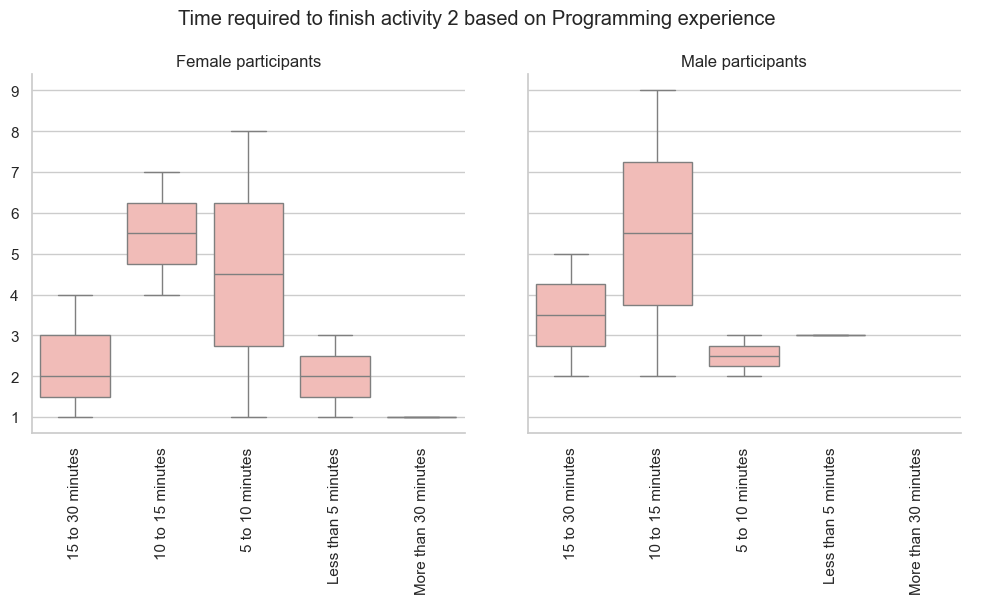

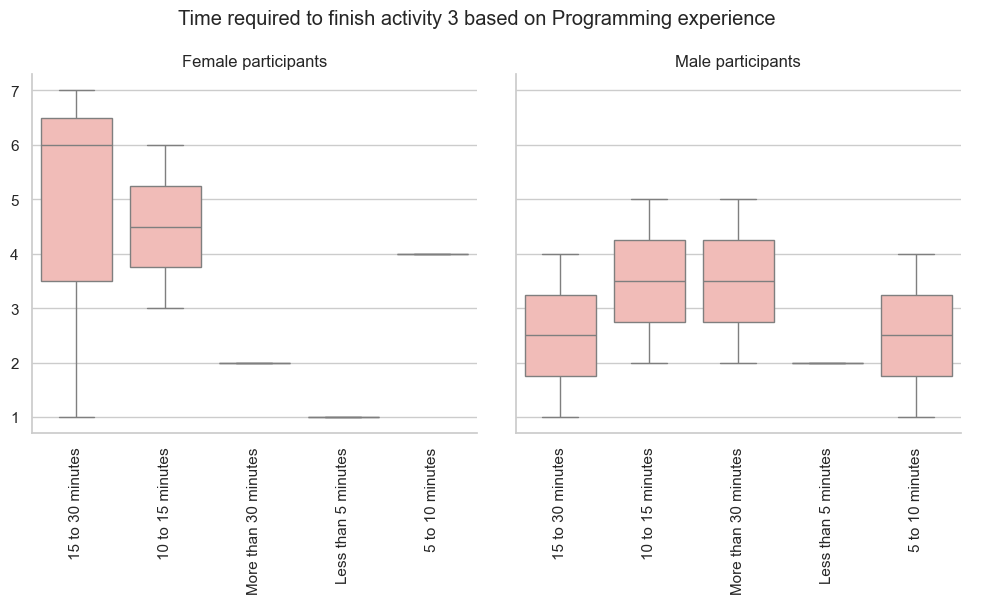

In [114]:
for activity in [f'Time required to finish activity {i}' for i in range(1, 4)]:
    df_activity = df.query('Gender != "I prefer not to tell"').groupby(['Gender', 'Programming experience'])[activity].value_counts().reset_index().rename(columns={'count': 'Count'})

    fig = sns.catplot(data=df_activity, x=activity, y='Count', col='Gender', kind='box')
    fig.set_xticklabels(rotation=90)
    fig.set_titles("{col_name} participants")
    fig.set_xlabels("")
    fig.figure.suptitle(f'{activity} based on Programming experience')
    fig.figure.subplots_adjust(top=0.85)
    fig.set_ylabels("")
    fig.savefig(f"images/Box/Box - {activity} based on Programming experience by gender.png")


# Charts for the journal paper

### Distribution of participant demographic data: a) role versus gender, b) affiliation or specialization field, and c) age ranging.

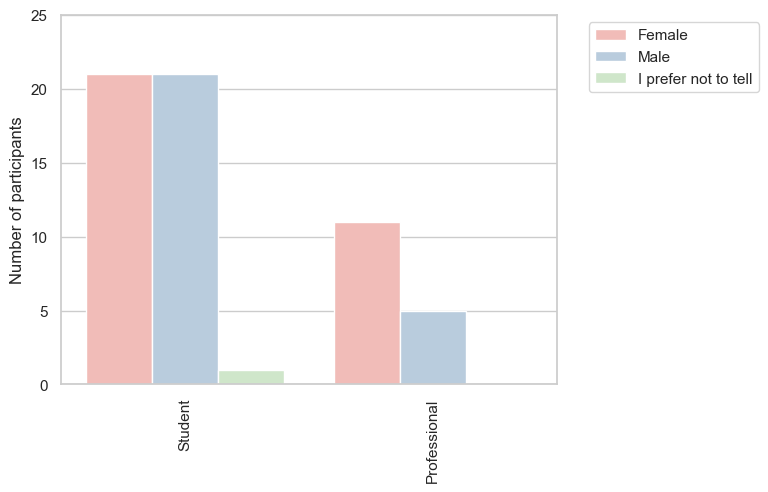

In [115]:
bar_chart_hue(data=df, column="Current role", hue="Gender", title=False, article_image=True)

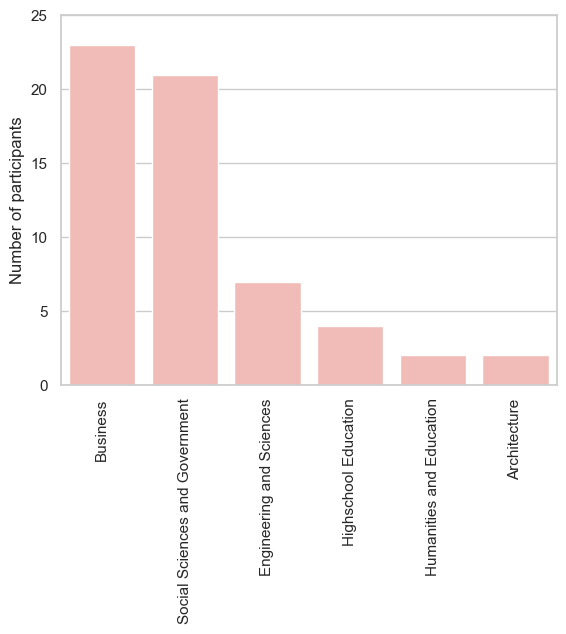

In [116]:
bar_chart(data=df, column="Affiliation", title=False, article_image=True)

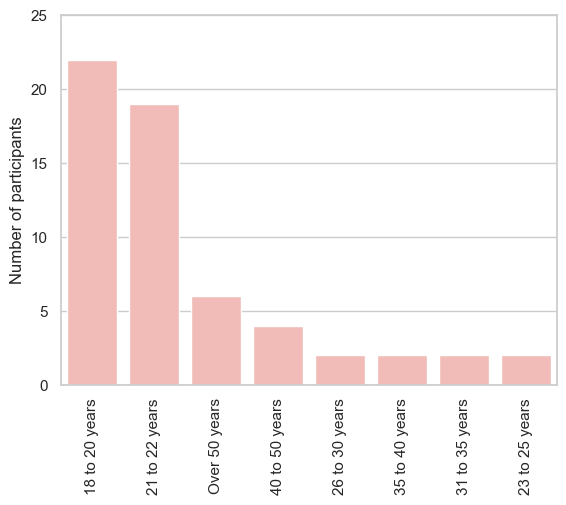

In [117]:
bar_chart(data=df, column="Age range", title=False, article_image=True)

### Distribution displaying participants’ programming experience based on their roles: a) students, and b) professionals.

In [118]:
sns.color_palette(palette)

[(0.984313725490196, 0.7058823529411765, 0.6823529411764706),
 (0.7019607843137254, 0.803921568627451, 0.8901960784313725),
 (0.8, 0.9215686274509803, 0.7725490196078432),
 (0.8705882352941177, 0.796078431372549, 0.8941176470588236),
 (0.996078431372549, 0.8509803921568627, 0.6509803921568628),
 (1.0, 1.0, 0.8),
 (0.8980392156862745, 0.8470588235294118, 0.7411764705882353),
 (0.9921568627450981, 0.8549019607843137, 0.9254901960784314),
 (0.9490196078431372, 0.9490196078431372, 0.9490196078431372)]

In [119]:
colors = {
    "Yes": sns.color_palette("Pastel1").as_hex()[0],
    "No": sns.color_palette("Pastel1").as_hex()[2],
    "Some": sns.color_palette("Pastel1").as_hex()[1]
}

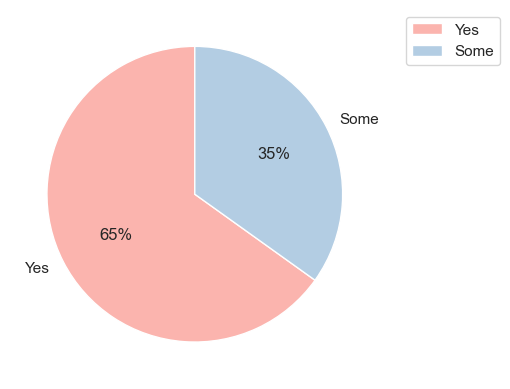

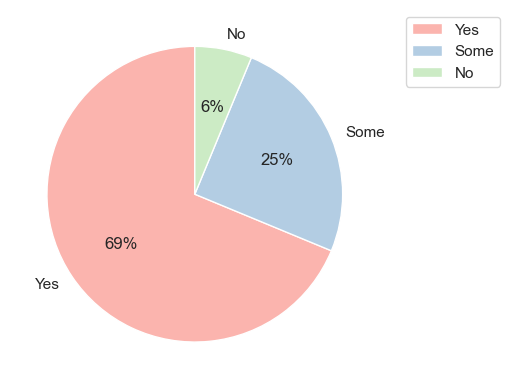

In [120]:
pie_chart(data=df[df["Current role"] == "Student"], column="Programming experience", colors=colors, title=False, subpath="Students", article_image=True)
pie_chart(data=df[df["Current role"] == "Professional"], column="Programming experience", colors=colors, title=False, subpath="Professionals", article_image=True)

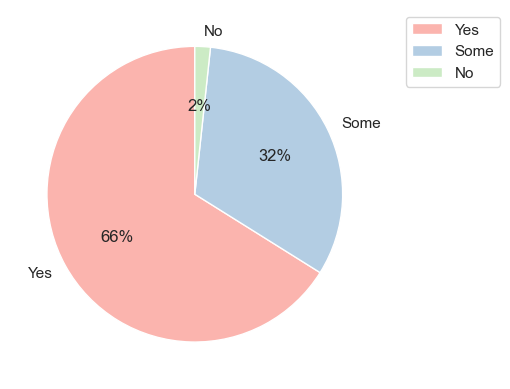

In [121]:
pie_chart(data=df, column="Programming experience", colors=colors, title=False, article_image=True)

### Distribution displaying participants’ experience in developing data analytics projects based on their roles: a) students, and b) professionals.

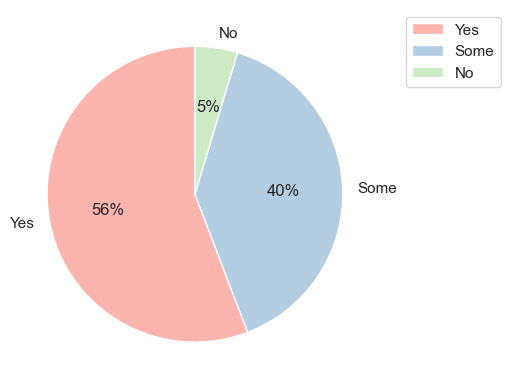

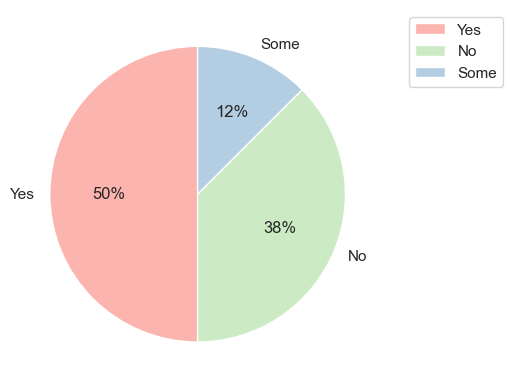

In [122]:
pie_chart(data=df[df["Current role"] == "Student"], column="Data analytics experience", colors=colors, title=False, subpath="Students", article_image=True)
pie_chart(data=df[df["Current role"] == "Professional"], column="Data analytics experience", colors=colors, title=False, subpath="Professionals", article_image=True)

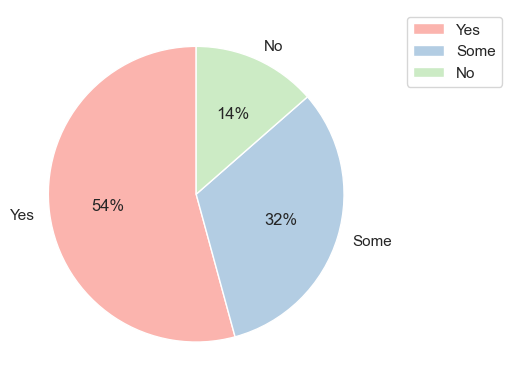

In [123]:
pie_chart(data=df, column="Data analytics experience", colors=colors, title=False, article_image=True)

### Distribution displaying participants’ experience in programming tools.

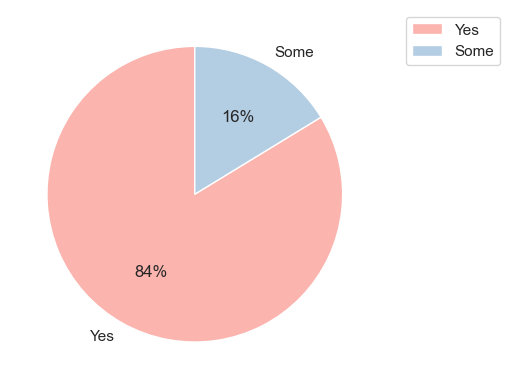

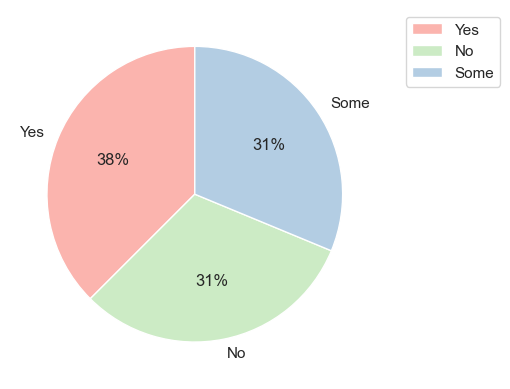

In [124]:
pie_chart(data=df[df["Current role"] == "Student"], column="Experience using tools like Python, Colab, etc.", colors=colors, title=False, subpath="Students", article_image=True)
pie_chart(data=df[df["Current role"] == "Professional"], column="Experience using tools like Python, Colab, etc.", colors=colors, title=False, subpath="Professionals", article_image=True)

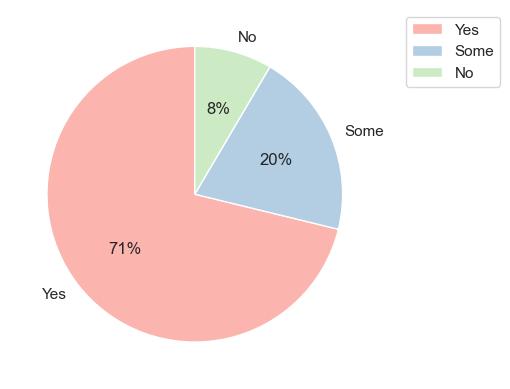

In [125]:
pie_chart(data=df, column="Experience using tools like Python, Colab, etc.", colors=colors, title=False, article_image=True)

### Distribution of participants’ experience related to the use of generative AI tools like ChatGPT.

#### Distribution of participants who have previously used ChatGPT for general purposes.

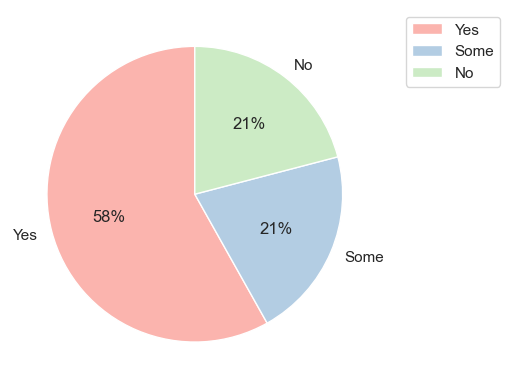

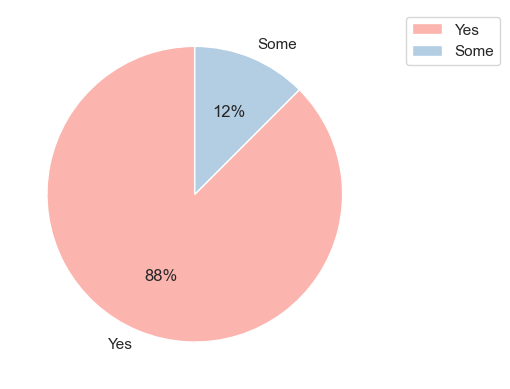

In [126]:
pie_chart(data=df[df["Current role"] == "Student"], column="Experience using ChatGPT in general", colors=colors, title=False, subpath="Students", article_image=True)
pie_chart(data=df[df["Current role"] == "Professional"], column="Experience using ChatGPT in general", colors=colors, title=False, subpath="Professionals", article_image=True)

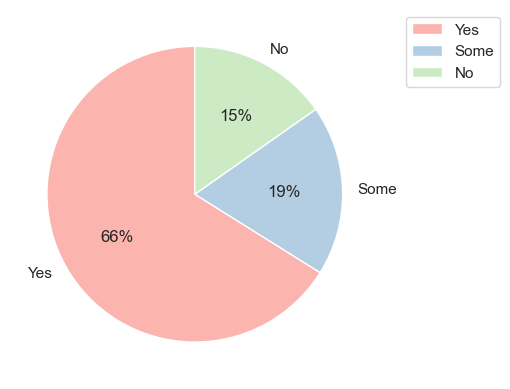

In [127]:
pie_chart(data=df, column="Experience using ChatGPT in general", colors=colors, title=False, article_image=True)

#### Distribution of participants who have previously used ChatGPT for programming tasks.

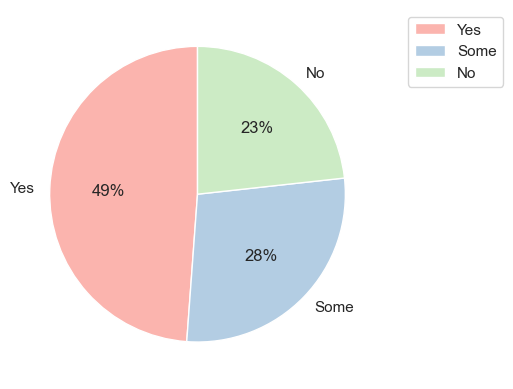

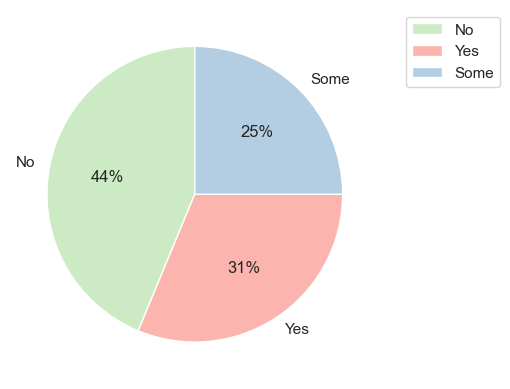

In [128]:
pie_chart(data=df[df["Current role"] == "Student"], column="Experience using ChatGPT for programming", colors=colors, title=False, subpath="Students", article_image=True)
pie_chart(data=df[df["Current role"] == "Professional"], column="Experience using ChatGPT for programming", colors=colors, title=False, subpath="Professionals", article_image=True)

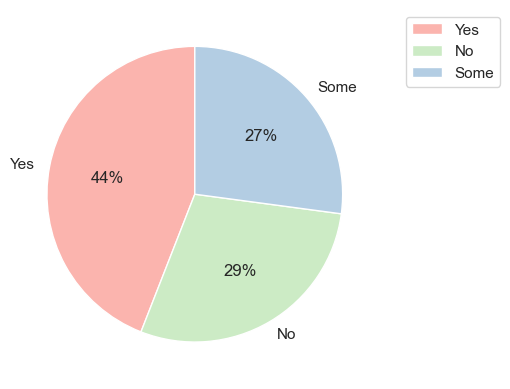

In [129]:
pie_chart(data=df, column="Experience using ChatGPT for programming", colors=colors, title=False, article_image=True)

#### Distribution of participants who have previously used ChatGPT for data analytics project development.

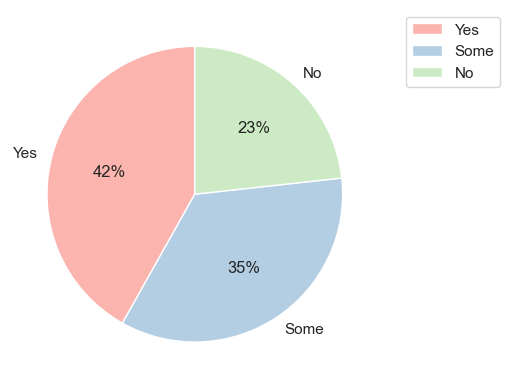

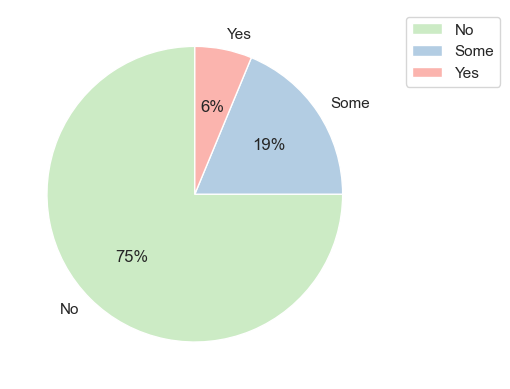

In [130]:
pie_chart(data=df[df["Current role"] == "Student"], column="Experience using ChatGPT for data analytics", colors=colors, title=False, subpath="Students", article_image=True)
pie_chart(data=df[df["Current role"] == "Professional"], column="Experience using ChatGPT for data analytics", colors=colors, title=False, subpath="Professionals", article_image=True)

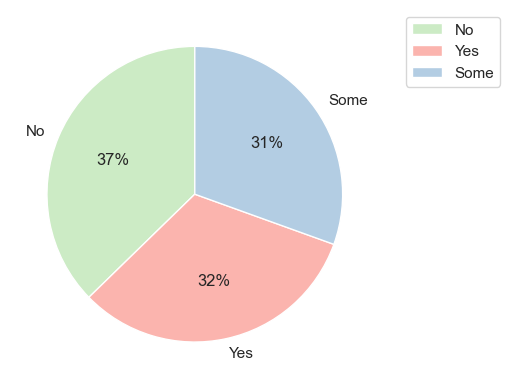

In [131]:
pie_chart(data=df, column="Experience using ChatGPT for data analytics", colors=colors, title=False, article_image=True)

#### Distribution of participants who have previously used APIs from any LLM provider, such as OpenAI.

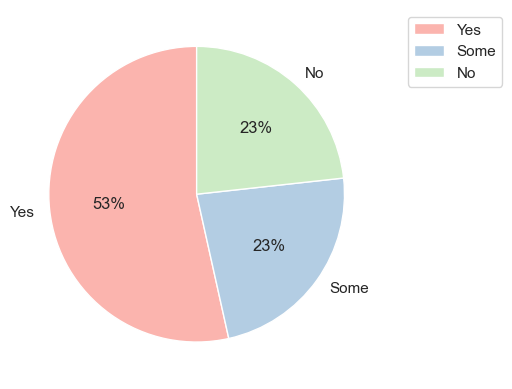

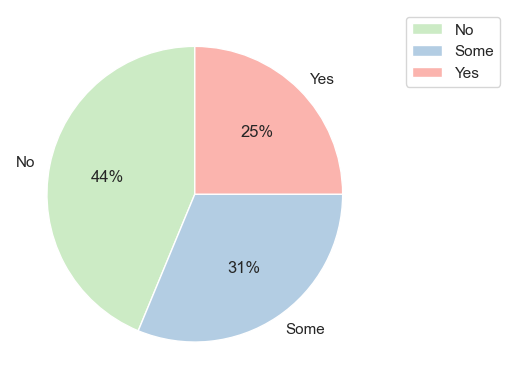

In [132]:
pie_chart(data=df[df["Current role"] == "Student"], column="Experience using generative APIs", colors=colors, title=False, subpath="Students", article_image=True)
pie_chart(data=df[df["Current role"] == "Professional"], column="Experience using generative APIs", colors=colors, title=False, subpath="Professionals", article_image=True)

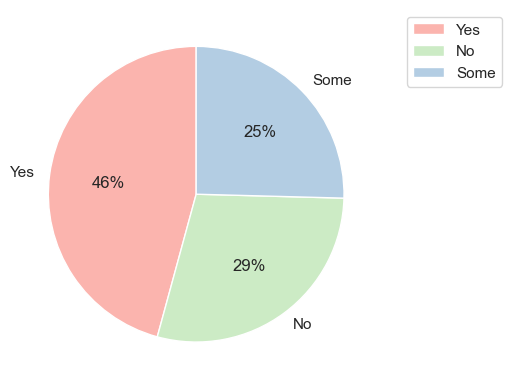

In [133]:
pie_chart(data=df, column="Experience using generative APIs", colors=colors, title=False, article_image=True)

### Lollipop charts

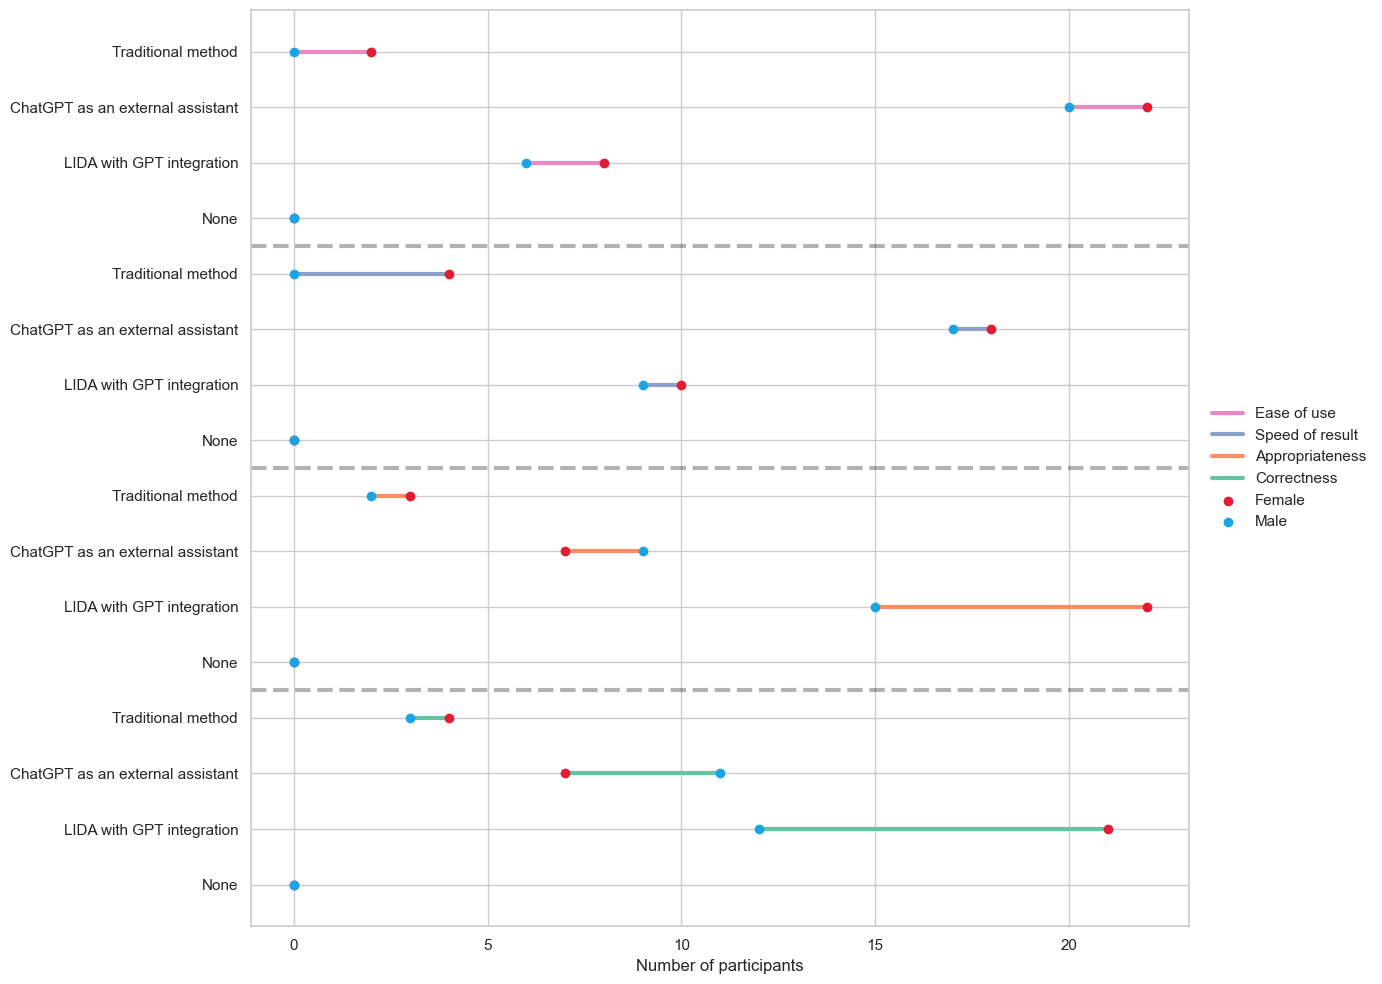

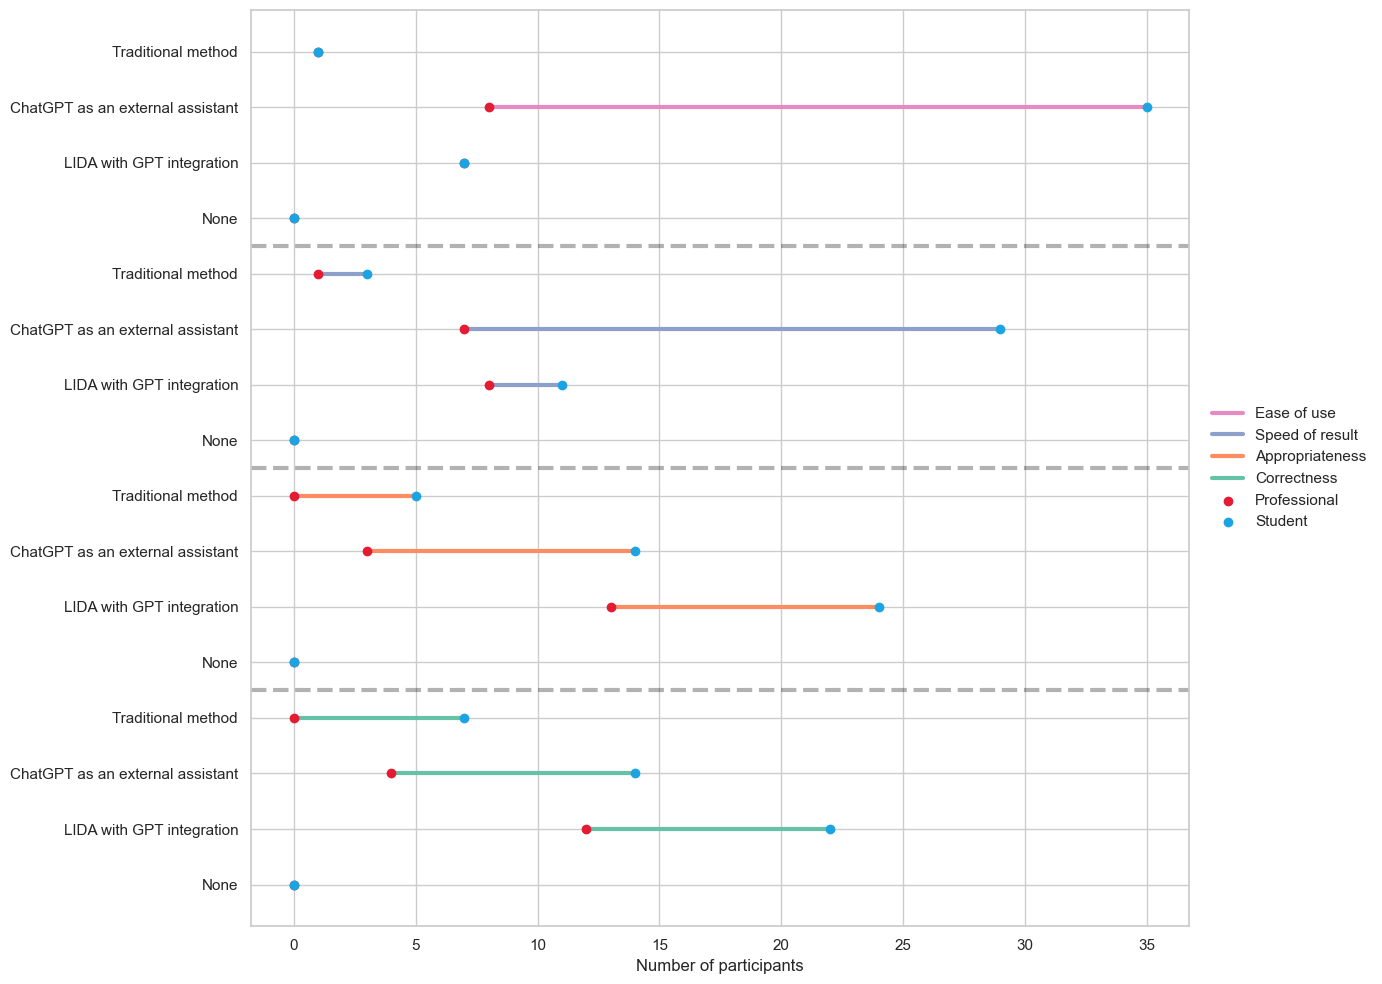

In [134]:
metrics = ["Ease of use", "Speed of result", "Appropriateness", "Correctness"]
options = ["Traditional method", "ChatGPT as an external assistant", "LIDA with GPT integration", "None"]
column_colors = ["#e31b33", "#1ba4e3"]
metrics_chart(df, "Gender", column_colors, ["I prefer not to tell"], metrics, options, title=False, article_image=True)
metrics_chart(df, "Current role", column_colors, [], metrics, options, title=False, article_image=True)

### Radar charts

In [135]:
metrics = ["Ease of use", "Speed of result", "Appropriateness", "Correctness"]
df_metrics = df.melt(value_vars=metrics, var_name="Metric", value_name="Answer").value_counts().reset_index().rename(columns={"count": "People"})
df_metrics = df_metrics.sort_values(by=["Metric", "Answer"], ascending=False)
min = df_metrics["People"].min()
max = df_metrics["People"].max()

ranges = [min, max]

df_metrics_filtered = df_metrics[~df_metrics["Answer"].isin(['None'])]
answers = df_metrics_filtered["Answer"].unique()
metrics = df_metrics_filtered["Metric"].unique()

fig = go.Figure()
for answer in answers:
    fig.add_trace(go.Scatterpolar(
        r=df_metrics_filtered[df_metrics_filtered["Answer"]==answer]["People"],
        theta=metrics,
        fill='toself',
        name=answer
        ))

fig.update_layout(
    title=f"Metric evaluation for participants",
    legend_title="Answer",
    width=1100,
    height=800,
    polar=dict(
        radialaxis=dict(
        visible=True,
        range=ranges
        )),
    showlegend=True,    
    )

fig.show()
fig.write_image(f"images/Journal/Radar - Metric evaluation for participants.png")